# **INDICE**

[1. Introducción](#scrollTo=j8GRukFZf_RP)\
[2. Audiencia](#scrollTo=aUA_aExfgHV5)\
[3. Contextos](#scrollTo=S_uRP_H6gKny)\
[4. Descripción del Datase](#scrollTo=IgspvlMCCi43)
* [4.1 Detalle de variables](#scrollTo=snvBwaSNewSb)

[5. Preprocesamiento de datos](#scrollTo=OVq03tGEDdcL)

[6. Hipótesis](#scrollTo=Ih5_v3I8MZpU)\
[7. Exploratory data analysis (EDA)](#scrollTo=xCcOfhrSv9Kl)
* [7.1 Paleta de colores](#scrollTo=_zHEZ2K7SMuB)
* [7.2 Generamos un grafico de Heatmap](#scrollTo=H9Xk4o0UCXgi)
* [7.3 Verificación de la cantidad de personas por género](#scrollTo=F83hzeWDxMkY)
* [7.4 Verificación de la cantidad de límite de crédito por género](#scrollTo=Mxnyo0bWJPYG)
* [7.5 Gráfico de Barras para Default Payment Next Month](#scrollTo=GvjvVsSdHN-6)
* [7.6 Género influyente de quien hace más default](#scrollTo=AQ_Emcre6Vmg)

* [7.7 Educación que influye en la mayoría de default](#scrollTo=Qhk4lSXpAbUV)
* [7.8 Estados civiles que tienden a caer más en default](#scrollTo=cDRzUz28BLCO)
* [7.9 Recomendaciones](#scrollTo=KPJ7NZ4tK6JF)

[8. Data Wrangling (MUNGING) - Con Outliers](#scrollTo=JhIkgWnRhTEp)
* [8.1 Método de escalado Mínimo-Máximo](#scrollTo=hoGd7t1jbwFy)
* [8.2 Feature engineering](#scrollTo=bvfMNBgElixN)

[9. Desarrollo del algoritmo](#scrollTo=ZP-9eufchhLk)

* [9.1 A tener en cuenta](#scrollTo=pt5puMf_ooCs)
* [9.2 Separar variable target](#scrollTo=ROWiBbBYj8ec)
* [9.3 Balanceo de clases](#scrollTo=xXBg8zqBDLc7)
* [9.4 Training Set](#scrollTo=EsBDK-eMmyq3)


[10. Model Building](#scrollTo=pRuN2uKik5cI)

* [10.1 Decision Tree Classifier](#scrollTo=p0LXlND_CMOV)
* [10.2 Random Forest Classifier](#scrollTo=s226ntVJf9Cq)
* [10.3 LGBM Classifier](#scrollTo=izreipAnLCgF)
* [10.4 Comparamos resultados](#scrollTo=EsBDK-eMmyq3)


[11. Conclusiones](#scrollTo=il84-dT-mtZ7)



## **Importación de librerias**



In [ ]:
# Actualizamos a la versión mas reciente
#!pip install --upgrade scikit-learn


In [ ]:
#Librerias basicas
import pandas as pd
import numpy as np

#Librerias de visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import requests
import json

#Librerias de Metricas 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

#Tecnicas de validación cruzada
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

#Técnicas de búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#Tencnica para escalar
from sklearn.preprocessing import MinMaxScaler


#Modelos de ML
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree #arbol de decision
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
import lightgbm as lgb



from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Introducción**  📝

De acuerdo al Dataset elegido para nuestro proyecto, contamos con información financiera sobre usuarios que acceden a créditos, así como también su capacidad de pago o atraso con el detalle de los meses de impago. La idea general del Proyecto Final de Data Science es crear un algoritmo de tipo “Clasificación” de Machine Learning, capaz de predecir si un usuario es propenso a ser un potencial deudor o no; teniendo en cuenta el historial de pagos anteriores y el análisis de su perfil crediticio, comparándolo con otros perfiles de deudores anteriores con similares características demográficas (Para poder determinar si es factible darle un aumento de crédito o no a dicho usuario). También poder, de forma contraria, predecir si un usuario es apto, tanto como para brindarle un crédito nuevo o aumentarle el que ya tiene. Con la información y también las variables del Dataset, construimos las siguientes hipótesis y las resolvimos a través de los gráficos generados, para verificar si las mismas son correctas o falsas para darnos un primer acercamiento al objetivo final planteado.

## **2. Audiencia** 📢

Este análisis va dirigido a la parte gerencial que se encarga de tomar las decisiones.

## **3. Contextos** 🌎

**Contexto comercial:** El cliente es un banco y está preocupado por que quiere analizar si estos clientes son propensos hacer default en el próximo mes.

**Problema comercial:** Hay diferentes factores que influyen para que un cliente pueda tener más limite de credito.

**Contexto analitico:** Hacer un analisis mas profundo con este tipo de características, y podremos dar recomendaciones al banco dado el resultado si por ejemplo: El cliente es propenso a entrar en default, reducir el límite de crédito hasta que pague todo, por que tiende a caer en default.

## **4. Hipótesis** 🔬


* Determinar qué factores son los que influyen para que un cliente haga default o no el mes próximo utilizando las caracteristicas demograficas.


### **Preguntas generadoras de insights**

**1.** Que genero influyente hace más default?

**2.** Dentro del nivel educativo, quien tiene más predominancia a generar default?

**3.** Dentro del estado civil, donde está la mayor concentración que tiende a hacer default el próximo mes?







## **5. Descripción del dataset elegido** 🎯




**Página de donde se obtuvo la base de datos:**  

https://www.kaggle.com/datasets/mariosfish/default-of-credit-card-clients

### **5.1 Detalle de variables:**





**X1: LIMIT_BAL** =
Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario)

**X2: SEX** =
Género (1 = masculino; 2 = femenino)

**X3: EDUCATION** =
Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 0, 4, 5, 6 = otros).


**X4: MARITAL_STATUS** =
Estado civil (1 = casado; 2 = soltero; 3 = divorciado; 0 = otros)


**X5: AGE** =
Edad (año)


X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es:

**-2: Sin consumo; -1: Pagado en su totalidad; 0: El uso de crédito revolvente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.**

**X6: PAY_1** =
Historial de pagos pasados. El estado de pago en septiembre de 2005*


**X7: PAY_2** =
Historial de pagos pasados. El estado de pago en agosto de 2005*

**X8: PAY_3** =
Historial de pagos pasados. El estado de pago en julio de 2005*

**X9: PAY_4** =
Historial de pagos pasados. El estado de pago en junio de 2005*

**X10: PAY_5** =
Historial de pagos pasados. El estado de pago en mayo de 2005*

**X11: PAY_6** =
Historial de pagos pasados. El estado de pago en abril de 2005*


X12-X17: Importe del estado de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.



**X12: BILL_AMT1** =
Importe del estado de cuenta en septiembre de 2005 (dólar NT)

**X13: BILL_AMT2** =
Importe del estado de cuenta en agosto de 2005 (dólar NT)

**X14: BILL_AMT3** =
Importe del estado de cuenta en julio de 2005 (dólar NT)

**X15: BILL_AMT4** =
Importe del estado de cuenta en junio de 2005 (dólar NT)

**X16: BILL_AMT5** =
Importe del estado de cuenta en mayo de 2005 (dólar NT)

**X17: BILL_AMT6** =
Importe del estado de cuenta en abril de 2005 (dólar NT)


X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.



**X18: PAY_AMT1** =
Importe del pago anterior. Pagado en septiembre de 2005 (dólar NT)

**X19: PAY_AMT2** =
Importe del pago anterior. Pagado en agosto de 2005 (dólar NT)

**X20: PAY_AMT3** =
Importe del pago anterior. Pagado en julio de 2005 (dólar NT)

**X21: PAY_AMT4** =
Importe del pago anterior. Pagado en junio de 2005 (dólar NT)

**X22: PAY_AMT5** =
Importe del pago anterior. Pagado en mayo de 2005 (dólar NT)

**X23: PAY_AMT6** =
Importe del pago anterior. Pagado en abril de 2005 (dólar NT)



Y: comportamiento del cliente; Y=0 entonces no por defecto, Y=1 entonces por defecto"


**Y: DEFAULT PAYMENT NEXT MONTH.** =  (1: Sí, 0: No)


In [ ]:
# Llamamos al Dataframe
df_credit_card = pd.read_csv('/content/drive/MyDrive/Data Science/Default of Credit Card Clients/default of credit card clients.csv')

# Esto hace que configuremos el Dataframe y podamos ver todas las columnas. 
#pd.set_option('max_columns', None)

# Vemos solo los primero 5 filas.
df_credit_card.head(5)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## **6. Pre procesamiento de datos** ⚙️🧹

In [ ]:
# Renombramos los nombres de las columnas del dataframe.
df_credit_card = df_credit_card.rename(columns={'Unnamed: 0': 'Index', 'X1': 'LIMIT_BAL', 'X2': 'SEX', 'X3': 'EDUCATION', 
                               'X4': 'MARITAL_STATUS', 'X5': 'AGE', 'X6': 'EST_PAY_SEP', 'X7': 'EST_PAY_AGOS', 'X8': 'EST_PAY_JUL',
                               'X9': 'EST_PAY_JUN', 'X10': 'EST_PAY_MAY', 'X11': 'EST_PAY_ABR', 'X12': 'IMP_DE_SEP',
                               'X13': 'IMP_DE_AGOS', 'X14': 'IMP_DE_JUL', 'X15': 'IMP_DE_JUN', 'X16': 'IMP_DE_MAY',
                               'X17': 'IMP_DE_ABR', 'X18': 'PAY_SEP', 'X19': 'PAY_AGOS', 'X20': 'PAY_JUL',
                               'X21': 'PAY_JUN', 'X22': 'PAY_MAY', 'X23': 'PAY_ABR', 'Y': 'DEFAULT_PAYMENT_NEXT_MONTH'})

In [ ]:
df_credit_card.head()

,Index,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,EST_PAY_SEP,EST_PAY_AGOS,EST_PAY_JUL,EST_PAY_JUN,...,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT_PAYMENT_NEXT_MONTH
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Se elimina fila.
df_credit_card.drop([0], axis=0, inplace=True) 

# Se elimina columna.
df_credit_card.drop(['Index'], axis=1, inplace=True)

# restablecer el índice, porque hemos una fila y una columna.
df_credit_card.reset_index(drop=True, inplace=True) 

df_credit_card.head()

,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,EST_PAY_SEP,EST_PAY_AGOS,EST_PAY_JUL,EST_PAY_JUN,EST_PAY_MAY,...,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT_PAYMENT_NEXT_MONTH
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Análizamos si tiene valores nulos.
df_credit_card.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARITAL_STATUS                0
AGE                           0
EST_PAY_SEP                   0
EST_PAY_AGOS                  0
EST_PAY_JUL                   0
EST_PAY_JUN                   0
EST_PAY_MAY                   0
EST_PAY_ABR                   0
IMP_DE_SEP                    0
IMP_DE_AGOS                   0
IMP_DE_JUL                    0
IMP_DE_JUN                    0
IMP_DE_MAY                    0
IMP_DE_ABR                    0
PAY_SEP                       0
PAY_AGOS                      0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_ABR                       0
DEFAULT_PAYMENT_NEXT_MONTH    0
dtype: int64

In [ ]:
# Verificación de tipos de datos.
df_credit_card.dtypes

LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARITAL_STATUS                object
AGE                           object
EST_PAY_SEP                   object
EST_PAY_AGOS                  object
EST_PAY_JUL                   object
EST_PAY_JUN                   object
EST_PAY_MAY                   object
EST_PAY_ABR                   object
IMP_DE_SEP                    object
IMP_DE_AGOS                   object
IMP_DE_JUL                    object
IMP_DE_JUN                    object
IMP_DE_MAY                    object
IMP_DE_ABR                    object
PAY_SEP                       object
PAY_AGOS                      object
PAY_JUL                       object
PAY_JUN                       object
PAY_MAY                       object
PAY_ABR                       object
DEFAULT_PAYMENT_NEXT_MONTH    object
dtype: object

In [ ]:
# Modificación de tipos de datos.

df_credit_card['LIMIT_BAL'] = df_credit_card.LIMIT_BAL.astype(int)
df_credit_card['AGE'] = df_credit_card.AGE.astype(int)
df_credit_card['IMP_DE_SEP'] = df_credit_card.IMP_DE_SEP.astype(int)
df_credit_card['IMP_DE_AGOS'] = df_credit_card.IMP_DE_AGOS.astype(int)
df_credit_card['IMP_DE_JUL'] = df_credit_card.IMP_DE_JUL.astype(int)
df_credit_card['IMP_DE_JUN'] = df_credit_card.IMP_DE_JUN.astype(int)
df_credit_card['IMP_DE_MAY'] = df_credit_card.IMP_DE_MAY.astype(int)
df_credit_card['IMP_DE_ABR'] = df_credit_card.IMP_DE_ABR.astype(int)
df_credit_card['PAY_SEP'] = df_credit_card.PAY_SEP.astype(int)
df_credit_card['PAY_AGOS'] = df_credit_card.PAY_AGOS.astype(int)
df_credit_card['PAY_JUL'] = df_credit_card.PAY_JUL.astype(int)
df_credit_card['PAY_JUN'] = df_credit_card.PAY_JUN.astype(int)
df_credit_card['PAY_MAY'] = df_credit_card.PAY_MAY.astype(int)
df_credit_card['PAY_ABR'] = df_credit_card.PAY_ABR.astype(int)
df_credit_card['DEFAULT_PAYMENT_NEXT_MONTH'] = df_credit_card.DEFAULT_PAYMENT_NEXT_MONTH.astype(int)


In [ ]:
# Vemos si los cambios fueron efectuados.
df_credit_card.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARITAL_STATUS                object
AGE                            int64
EST_PAY_SEP                   object
EST_PAY_AGOS                  object
EST_PAY_JUL                   object
EST_PAY_JUN                   object
EST_PAY_MAY                   object
EST_PAY_ABR                   object
IMP_DE_SEP                     int64
IMP_DE_AGOS                    int64
IMP_DE_JUL                     int64
IMP_DE_JUN                     int64
IMP_DE_MAY                     int64
IMP_DE_ABR                     int64
PAY_SEP                        int64
PAY_AGOS                       int64
PAY_JUL                        int64
PAY_JUN                        int64
PAY_MAY                        int64
PAY_ABR                        int64
DEFAULT_PAYMENT_NEXT_MONTH     int64
dtype: object

In [ ]:
# Creamos una copia ya procesada de dataframe "df_credit_card"
df_copy = df_credit_card.copy(deep=True)

In [ ]:
df_copy["EST_PAY_SEP"].value_counts()

0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: EST_PAY_SEP, dtype: int64

In [ ]:
df_copy[df_copy["DEFAULT_PAYMENT_NEXT_MONTH"] == 1].iloc[:,11:26]


,IMP_DE_SEP,IMP_DE_AGOS,IMP_DE_JUL,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT_PAYMENT_NEXT_MONTH
0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,2500,2500,2500,2500,2500,2500,0,0,0,0,0,0,1
29994,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df_copy[df_copy["DEFAULT_PAYMENT_NEXT_MONTH"] == 1].iloc[:,5:12] 

,EST_PAY_SEP,EST_PAY_AGOS,EST_PAY_JUL,EST_PAY_JUN,EST_PAY_MAY,EST_PAY_ABR,IMP_DE_SEP
0,2,2,-1,-1,-2,-2,3913
1,-1,2,0,0,0,2,2682
13,1,2,2,0,0,2,65802
16,0,0,2,2,2,2,15376
21,-1,-1,-1,-1,-1,-1,316
...,...,...,...,...,...,...,...
29991,3,2,2,2,2,2,2500
29994,2,2,2,2,2,2,72557
29997,4,3,2,-1,0,0,3565
29998,1,-1,0,0,0,-1,-1645


In [ ]:
df_copy[df_copy["DEFAULT_PAYMENT_NEXT_MONTH"] == 0].iloc[100:200,11:26]


,IMP_DE_SEP,IMP_DE_AGOS,IMP_DE_JUL,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR,DEFAULT_PAYMENT_NEXT_MONTH
134,28452,26145,26712,25350,17603,-780,2000,1400,0,500,0,1560,0
135,10674,12035,13681,13269,14158,13891,1500,1800,0,1000,0,327,0
136,17444,19342,22000,24614,27200,30229,2500,3000,3000,3000,3500,5000,0
137,7166,7997,8792,9189,4404,5708,1500,1500,1000,500,2000,546,0
139,50801,50143,49586,19430,19375,18995,2360,1700,1000,900,870,2130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,70243,47779,28052,7222,99669,84426,7042,2000,1000,99669,12600,10000,0
254,19532,3719,1453,4944,1896,2486,3127,1469,4968,1905,2494,862,0
255,27699,28513,29341,29928,29533,28538,1565,1393,980,994,1024,886,0
256,1154,1233,862,1355,1130,21361,1233,1075,1355,1130,21361,1347,0


In [ ]:
df_copy[df_copy["DEFAULT_PAYMENT_NEXT_MONTH"] == 0].iloc[100:200,5:12] 

,EST_PAY_SEP,EST_PAY_AGOS,EST_PAY_JUL,EST_PAY_JUN,EST_PAY_MAY,EST_PAY_ABR,IMP_DE_SEP
134,0,0,0,0,0,0,28452
135,0,0,0,2,2,2,10674
136,0,0,0,0,0,0,17444
137,0,0,0,0,0,0,7166
139,0,0,0,0,0,0,50801
...,...,...,...,...,...,...,...
253,0,0,0,0,-1,0,70243
254,-1,0,-1,-1,-1,-1,19532
255,0,0,0,0,0,0,27699
256,0,-1,-1,-1,-1,-1,1154


In [ ]:
df_copy[df_copy["DEFAULT_PAYMENT_NEXT_MONTH"] == 0].iloc[:,5:12]["EST_PAY_SEP"].value_counts() 

0     12849
-1     4732
1      2436
-2     2394
2       823
3        78
4        24
5        13
8         8
6         5
7         2
Name: EST_PAY_SEP, dtype: int64

In [ ]:
df_copy[df_copy["DEFAULT_PAYMENT_NEXT_MONTH"] == 1].iloc[:,5:12]["EST_PAY_SEP"].value_counts() 

0     1888
2     1844
1     1252
-1     954
-2     365
3      244
4       52
5       13
8       11
7        7
6        6
Name: EST_PAY_SEP, dtype: int64

In [ ]:
# Renombramos los datos categóricos de la columna "SEX".
df_copy['SEX']= df_copy['SEX'].replace(to_replace=["1", "2"],
           value=["Masculino","Femenino"])

df_copy['SEX']


0         Femenino
1         Femenino
2         Femenino
3         Femenino
4        Masculino
           ...    
29995    Masculino
29996    Masculino
29997    Masculino
29998    Masculino
29999    Masculino
Name: SEX, Length: 30000, dtype: object

In [ ]:
# Creamos un pandas serie para contamos la cantidad de género existente.
count_gender = pd.Series(df_copy.groupby(["SEX"]).size())
1
count_gender

SEX
Femenino     18112
Masculino    11888
dtype: int64

In [ ]:
# Renombramos los datos categóricos de la columna "EDUCATION"
df_copy['EDUCATION']= df_copy['EDUCATION'].replace(to_replace=["0","1","2","3","4","5","6"],
           value=["Otros","Posgrado","Universidad","Secundaria","Otros","Otros","Otros"])
df_copy['EDUCATION']


0        Universidad
1        Universidad
2        Universidad
3        Universidad
4        Universidad
            ...     
29995     Secundaria
29996     Secundaria
29997    Universidad
29998     Secundaria
29999    Universidad
Name: EDUCATION, Length: 30000, dtype: object

In [ ]:
df_copy.groupby(["EDUCATION"]).size()


EDUCATION
Otros            468
Posgrado       10585
Secundaria      4917
Universidad    14030
dtype: int64

In [ ]:
# Renombramos los datos categóricos de la columna "MARITAL_STATUS"
df_copy['MARITAL_STATUS']= df_copy['MARITAL_STATUS'].replace(to_replace=["0","1","2","3"],
           value=["Otros","Casado","Soltero","Divorciado"])
df_copy['MARITAL_STATUS']

0         Casado
1        Soltero
2        Soltero
3         Casado
4         Casado
          ...   
29995     Casado
29996    Soltero
29997    Soltero
29998     Casado
29999     Casado
Name: MARITAL_STATUS, Length: 30000, dtype: object

In [ ]:
df_copy.groupby(["MARITAL_STATUS"]).size()


MARITAL_STATUS
Casado        13659
Divorciado      323
Otros            54
Soltero       15964
dtype: int64

### Puntos importantes a destacar en el **preprocesamiento de datos** 🔧

 ✅ Renombramos las columnas.\
 ✅ Hicimos un reset index.\
 ✅ Verificamos si tenemos valores nulos.\
 ✅ Modificamos los tipos de datos.\
 ✅ Generamos una copia del dataframe para poder trabajarlo.\
 ✅ Renombramos los datos catégoricos de las columnas "SEX", "EDUCATION" y "MARITAL_STATUS".







## **7. Exploratory data analysis (EDA)** 📊

Planteada ya nuestra hipótesis se realiza un EDA para identificar errores obvios, así como comprender mejor los patrones en los datos, detectar valores atípicos o sucesos anómalos, y encontrar relaciones interesantes entre las variables. Una vez se ha completado el EDA y se ha extraído la información útil, sus características pueden utilizarse para un análisis o modelado de datos más complejo, incluido el machine learning.

### **7.1 Paleta de colores**

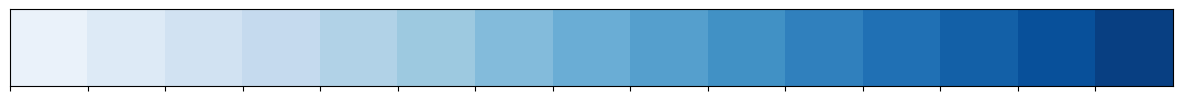

In [ ]:
squential_15 = sns.color_palette('Blues', 15)
sns.palplot(squential_15)

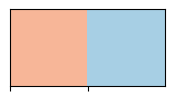

In [ ]:
squential_2 = sns.color_palette('RdBu', 2)
sns.palplot(squential_2)

### **7.2 Generamos un grafico de Heatmap para ver las correlaciones.**


<ipython-input-98-563fa20428a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_copy.corr(method="pearson")


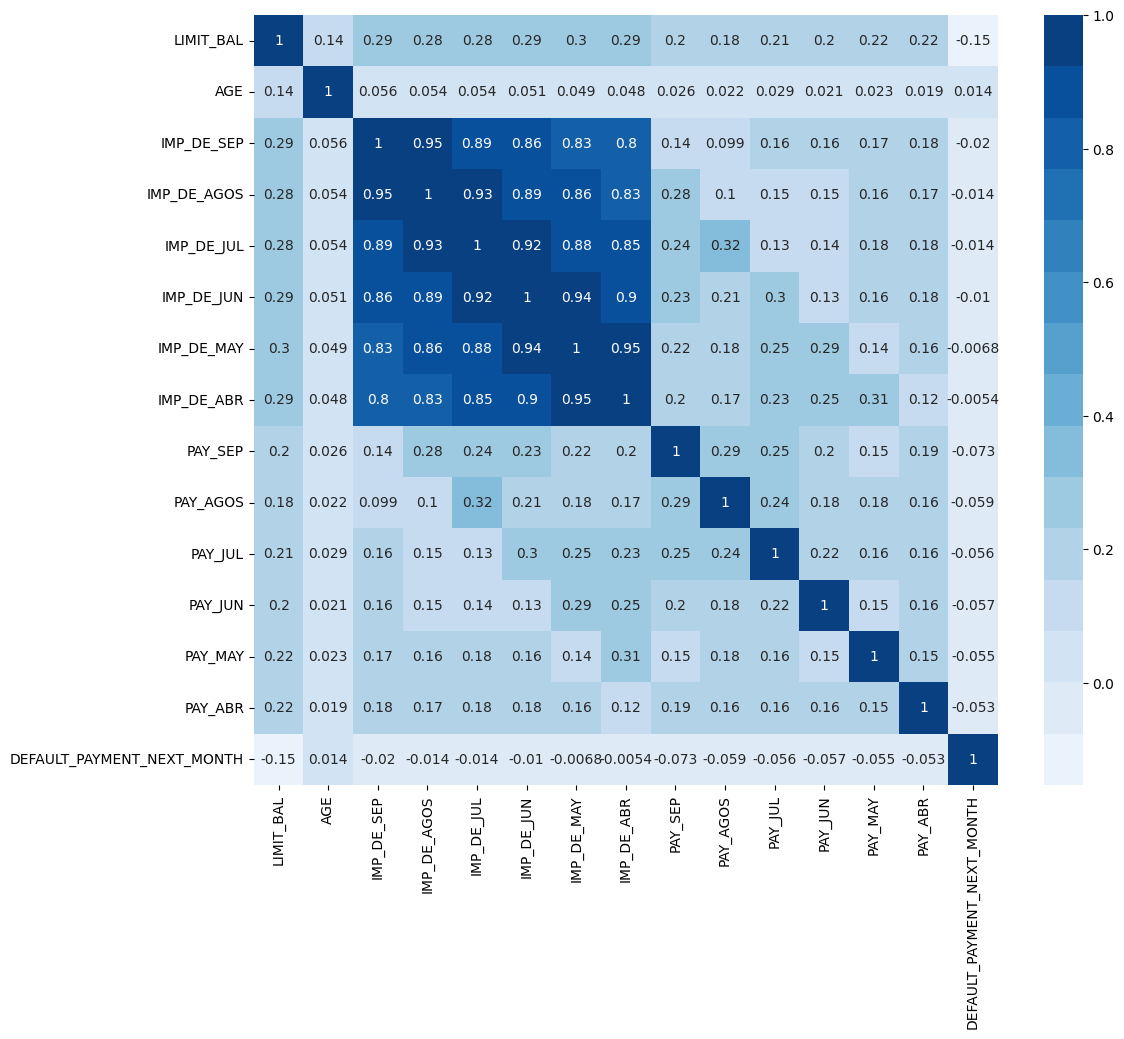

In [ ]:

df_corr = df_copy.corr(method="pearson")

plt.figure(figsize=(12, 10))

sns.heatmap(df_corr, annot=True, cmap=squential_15)
plt.show() 

➡️  La mayoría de las características demográficas que queremos analizar no son tomadas, ya que son tipo categóricas (sexo, educación y estado civil), la unica que podemos ver es la "edad", que es de tipo cuantitativa y al compararse con el límite de crédito, vemos que nos da una relación demasiado débil (0.14).

### **7.3 Verificamos la cantidad de personas por género**

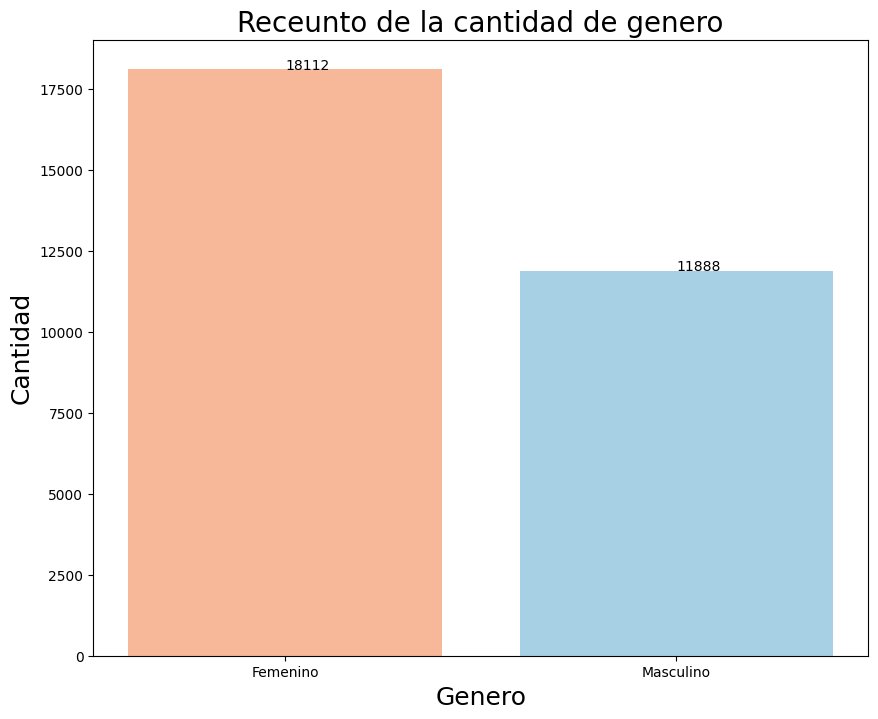

In [ ]:
# Gráfico de barras.
fig, ax = plt.subplots(figsize=(10,8)) # figsize: (ancho,alto) en pulgadas 
ax.bar(count_gender.index, count_gender.values, color=squential_2)

# Etiquetas para el titulo y los ejes.
ax.set_title('Receunto de la cantidad de genero', size=20)
ax.set_ylabel('Cantidad', size=18)
ax.set_xlabel('Genero', size=18)

#para que me muestre el eje X mas claro.
plt.xticks(np.arange(0, 2, step=1)) 

#Para agregar etiqueta con el valor numérico sobre las barras.
for x, y in zip(count_gender.index, count_gender.values):
 plt.annotate(y, (x, y))

plt.show()

### **7.4 Verificamos la cantidad de límite de credito por género**

<ipython-input-100-4c870d6b4337>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_copy, x="SEX", y="LIMIT_BAL", kind='bar', height=5, aspect=10/7, ci=None, palette=squential_2)


<Figure size 1000x800 with 0 Axes>

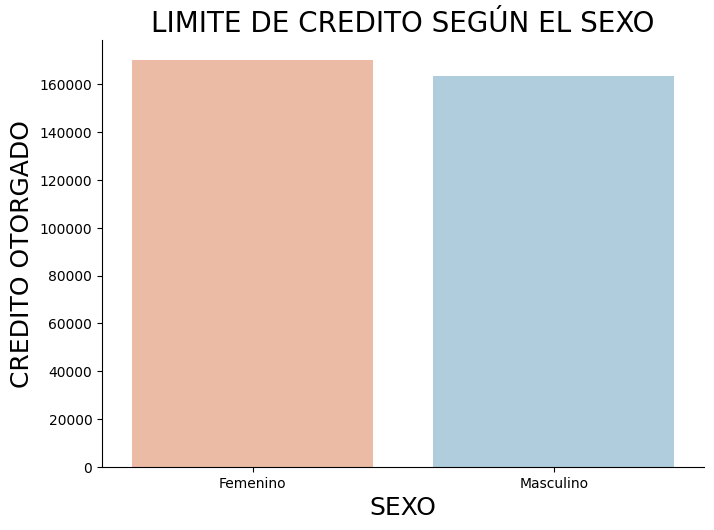

In [ ]:
plt.figure(figsize = ( 10 , 8 )) 

# x-y son variables a comparar
sns.catplot(data=df_copy, x="SEX", y="LIMIT_BAL", kind='bar', height=5, aspect=10/7, ci=None, palette=squential_2)

plt.xlabel( "SEXO" , size = 18 ) 
  
plt.ylabel( "CREDITO OTORGADO" , size = 18 ) 
  
plt.title( "LIMITE DE CREDITO SEGÚN EL SEXO" , size = 20 ) 
plt.show() 


➡️ Bien, luego de verificar el Límite de crédito por género y la cantidad podemos concluir con lo siguientes puntos:
* El género femenino representa el 60.4% de los datos y el género masculino al 39.6% de los datos.
* También podemos ver que el género masculino, al ser de menor porcentaje, casi equipara al límite de crédito promedio otorgado al género femenino.


Perfecto, sigamos analizando a ver que mas descubrimos !!! 🤓 

### **7.5 Grafico de Barras para  Default Payment Next Month**

In [ ]:
count_payment_default = pd.Series(df_copy.groupby(['DEFAULT_PAYMENT_NEXT_MONTH']).size())
count_payment_default


DEFAULT_PAYMENT_NEXT_MONTH
0    23364
1     6636
dtype: int64

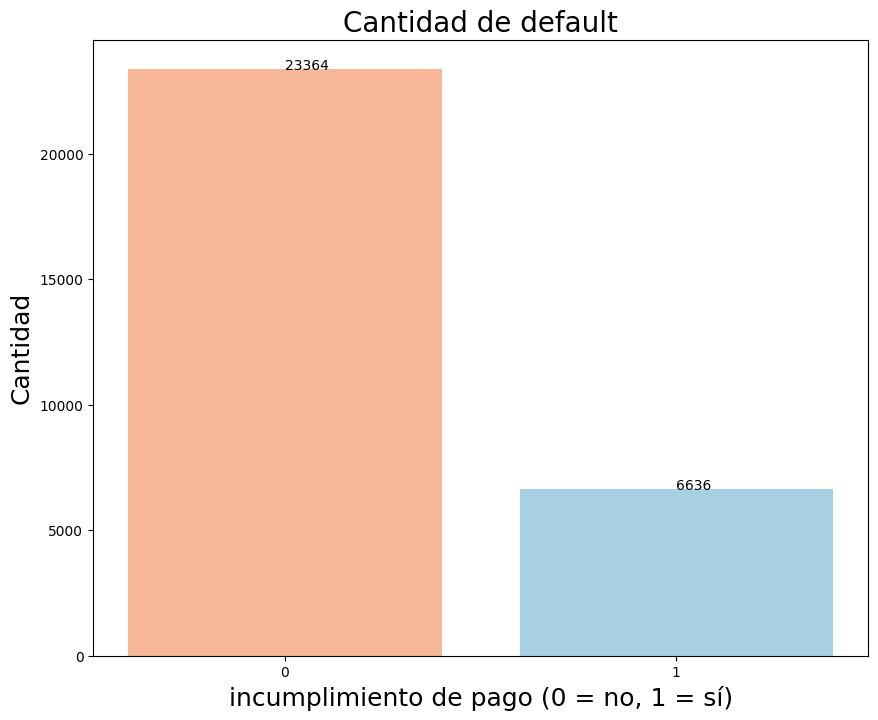

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(count_payment_default.index, count_payment_default.values, color=squential_2)

ax.set_title('Cantidad de default', size=20)
ax.set_xlabel('incumplimiento de pago (0 = no, 1 = sí)', size=18)
ax.set_ylabel('Cantidad',size=18)

plt.xticks(np.arange(0, 2, step=1)) #para que me muestre eje x mas claro

#PARA AGREGAR ETIQUETA CON EL VALOR NUMERICO SOBRE LAS BARRAS:
for x, y in zip(count_payment_default.index, count_payment_default.values):
 plt.annotate(y, (x, y))



➡️ Podemos concluir que que el 22.1% de los cllientes no están interesados ​​en un pago el próximo mes. Ahora analicemos algunos datos rápidamente y observemos la distribución de las otras características de datos.

### **7.6 Género influyente de quien hace más default**


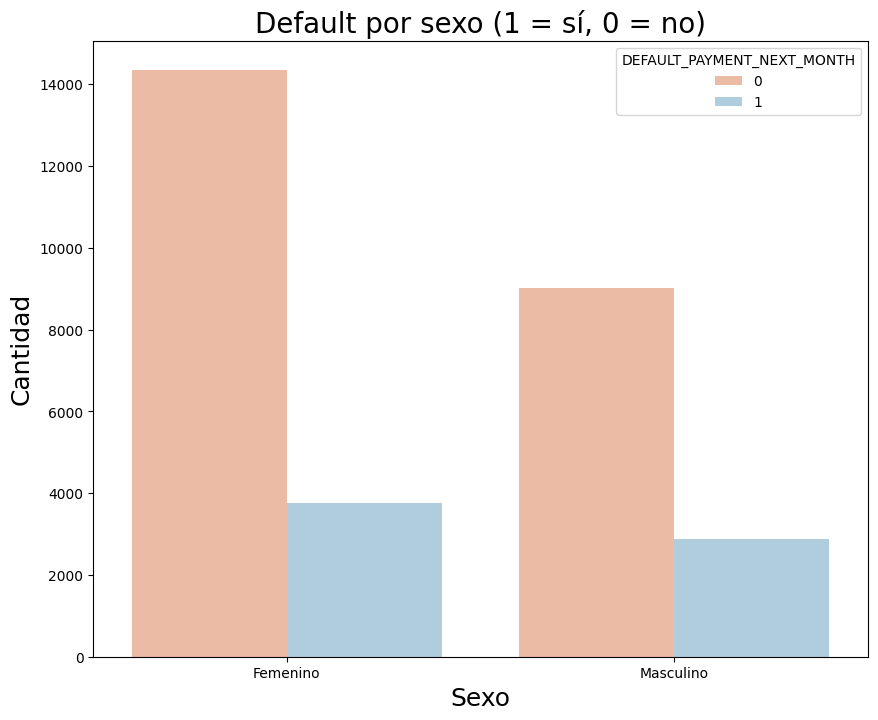

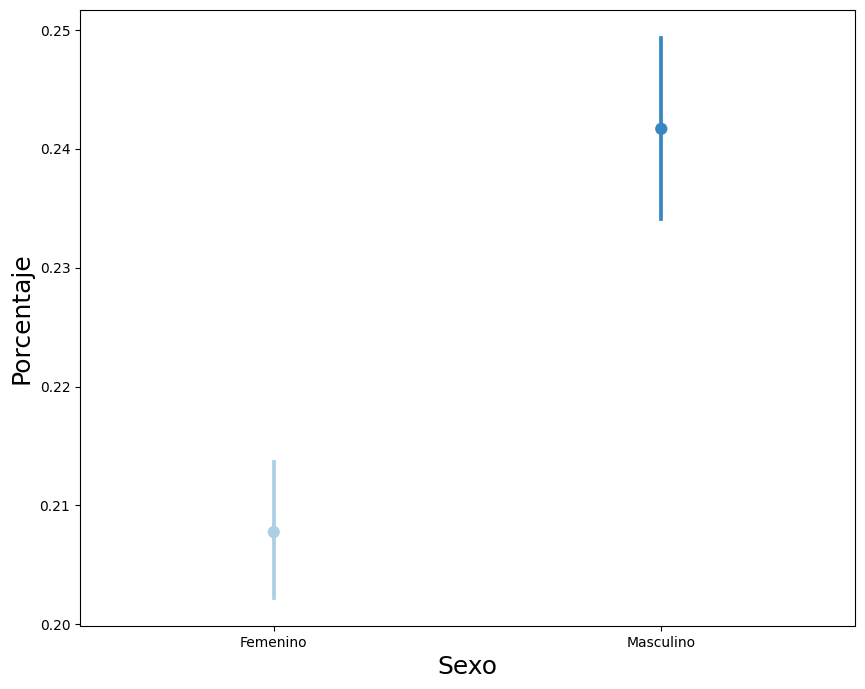

In [ ]:
plt.figure(figsize = ( 10 , 8 )) # Con esto aumentamos el tamaño del grafico 

sns.countplot(data=df_copy, x=df_copy['SEX'], hue=df_copy['DEFAULT_PAYMENT_NEXT_MONTH'], palette= squential_2)

plt.title('Default por sexo (1 = sí, 0 = no)', size=20)
plt.ylabel('Cantidad',size=18)
plt.xlabel('Sexo',size=18)
plt.show()


plt.figure(figsize = ( 10 , 8 ))
sns.pointplot(data=df_copy, x=df_copy['SEX'], y=df_copy['DEFAULT_PAYMENT_NEXT_MONTH'], palette='Blues')

plt.ylabel('Porcentaje',size=18)
plt.xlabel('Sexo',size=18)

plt.show()

#### <font color="red">**Respuesta al insight N° 1**</font>



Podemos ver que el género masculino tiende a tener mayor default un 24% y el género femenino un 21%. 

Lo que sí a tener en cuenta es que hay mayor cantidad de género femenino que masculino.

### **7.7 Educación que influye en la mayoría de default**

---



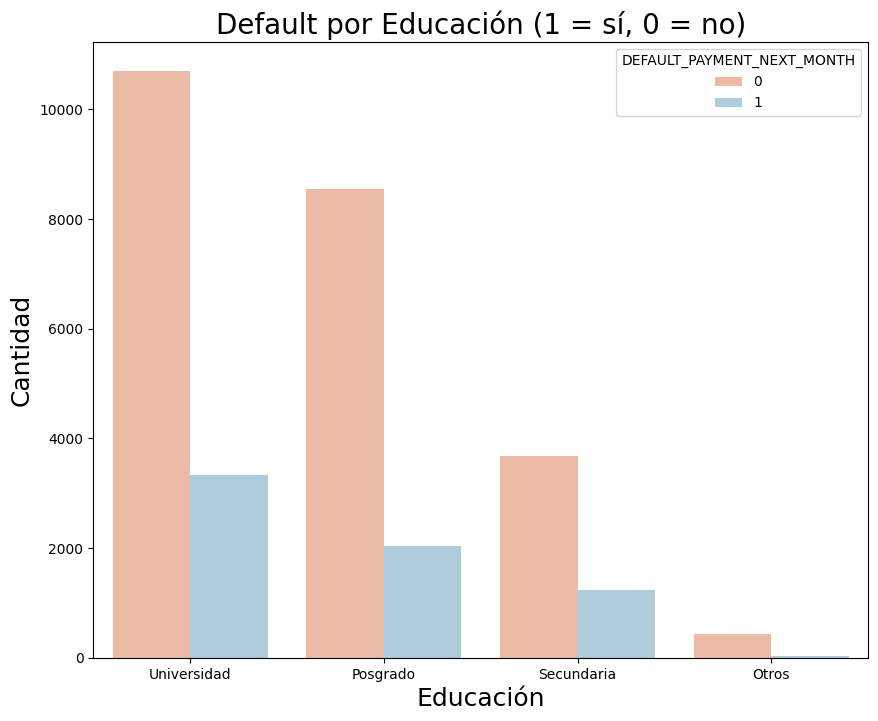

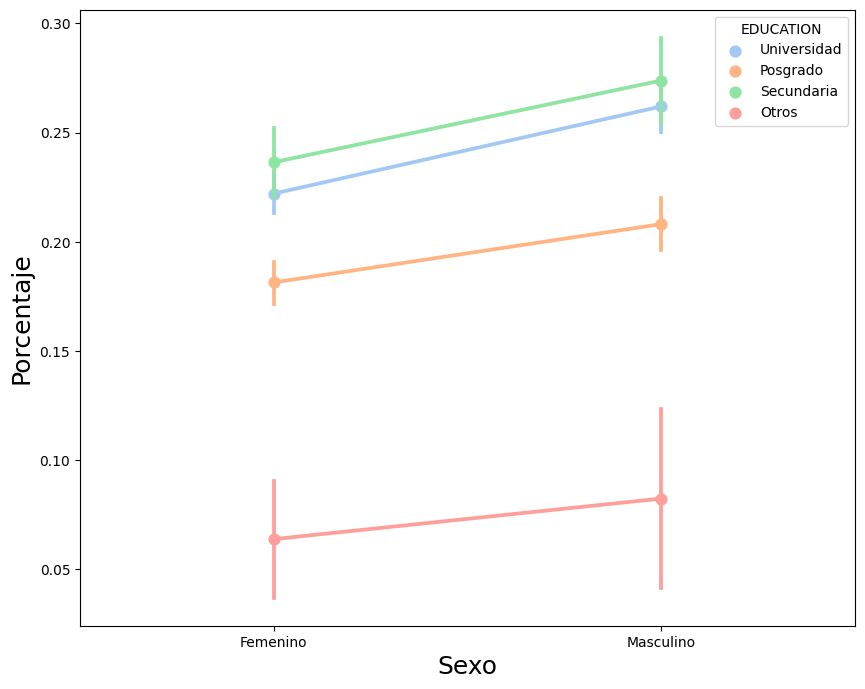

In [ ]:
plt.figure(figsize = ( 10 , 8 )) # Con esto aumentamos el tamaño del grafico 

sns.countplot(data=df_copy, x=df_copy['EDUCATION'], hue=df_copy['DEFAULT_PAYMENT_NEXT_MONTH'], palette= squential_2)

plt.title('Default por Educación (1 = sí, 0 = no)', size=20)
plt.ylabel('Cantidad',size=18)
plt.xlabel('Educación',size=18)
plt.show()

plt.figure(figsize = ( 10 , 8 ))
sns.pointplot(data=df_copy, x=df_copy['SEX'], y=df_copy['DEFAULT_PAYMENT_NEXT_MONTH'], hue='EDUCATION', palette= 'pastel')

plt.ylabel('Porcentaje',size=18)
plt.xlabel('Sexo',size=18)
plt.show()



#### <font color="red">**Respuesta al insight N° 2**</font>

Vemos que secundaria tiene mayor cantidad de default, un 24% para las mujeres y un 26% para el hombre.

Pero si vemos la categoría de Universidad es la que tiene mayor concentración de personas en su categoría y el porcentaje que tiene es de un 22% para las mujeres y un 24% para los hombres que hacen default. No es tan lejano con respecto a la categoría Secundaria. 

### **7.8 Estados civiles que tienden a caer mas en default**

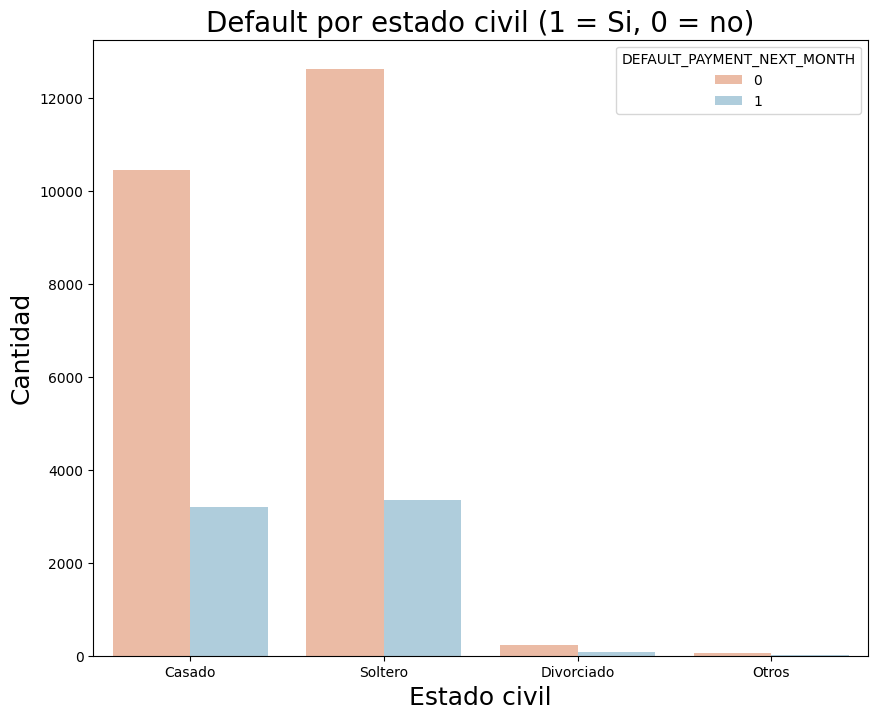

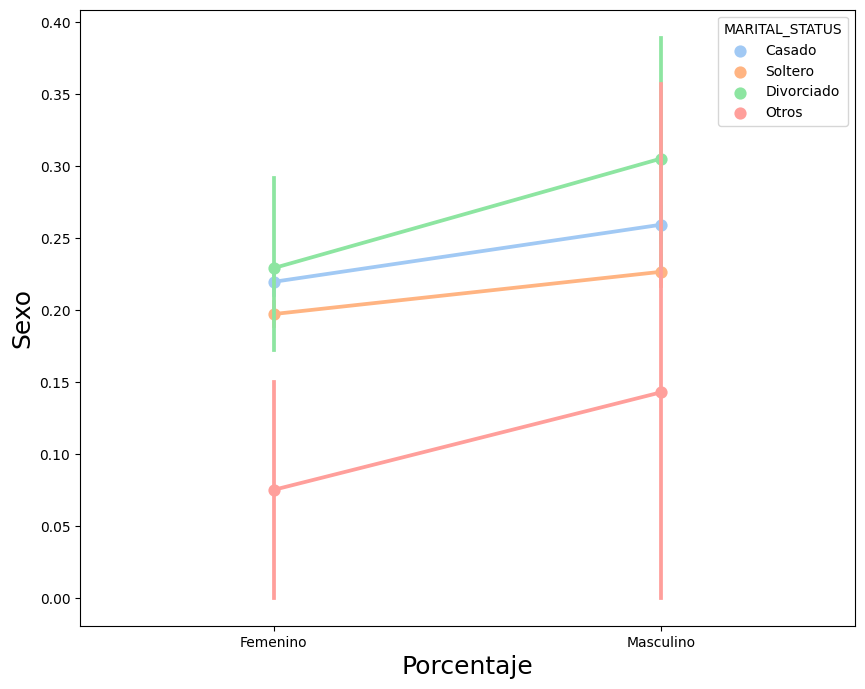

In [ ]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df_copy, x=df_copy['MARITAL_STATUS'], hue=df_copy['DEFAULT_PAYMENT_NEXT_MONTH'],palette= squential_2)

plt.title('Default por estado civil (1 = Si, 0 = no)', size=20)
plt.xlabel('Estado civil', size=18)
plt.ylabel('Cantidad', size=18)

plt.show()

plt.figure(figsize=(10, 8))

sns.pointplot(data=df_copy, x=df_copy['SEX'], y=df_copy['DEFAULT_PAYMENT_NEXT_MONTH'], hue='MARITAL_STATUS', palette= 'pastel')
plt.xlabel('Porcentaje', size=18)
plt.ylabel('Sexo', size=18)
plt.show()


#### <font color="red">**Respuesta al insight N° 3**</font>


La Mayor concentración de default para el proximo mes esta en la categoría de divorciados hay mayor porcentaje de default.
*  30% para género masculino y un 25% para genero femenino.

Seguido por las categorias de Soltero y Casados.
* Solteros con un 21% para los hombres y 19 % para las mujeres.
* Casados con un  24% para los hombres y un 19% para las mujeres.


### **7.9 Recomendaciones**


* En la educación, vemos que los que tienen titulación secundaria tienden a tener mayor default. Podemos recomendar ver la cantidad de personas que tienen titulación con secundaria y tratar de darle menos limite de crédito. 
También para generar mayor impacto en bajar el default se puede recomendar concentrarse en las personas con titulación universitaria y de posgrado.

* En el estado civil, se recomienda seguir limitando el límite de crédito para las personas divorciadas, ya que son las que generan mayor default.

## **8. Data Wrangling (MUNGING) - Con Outliers** 👨‍💻


Bien, ya estamos casi a la mitad y esto recién se está poniendo interesante!!! 👨‍✈️

En este paso previo al desarrollo del algoritmo, nos vamos a centrar en la preparación y transformación de nuestros datos crudos.


**A tener en cuenta:** No se quitó los outliers porque la mejora es insignificante más adelante, para no perder información se tomó la decisión de dejar los outliers.



###**8.1 Data Scalling**
**Método Mínimo-Máximo**

El MinMaxScaler es una técnica de preprocesamiento de datos que se utiliza en Machine Learning para normalizar los datos en un rango específico; un rango entre 0 y 1.

Además permite una comparación equitativa de las características y reduce la sensibilidad a los valores extremos. Como resultado, puede mejorar el rendimiento de los modelos de Machine Learning que usan medidas de distancia o similitud entre características.

In [ ]:
df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARITAL_STATUS', 'AGE', 'EST_PAY_SEP',
       'EST_PAY_AGOS', 'EST_PAY_JUL', 'EST_PAY_JUN', 'EST_PAY_MAY',
       'EST_PAY_ABR', 'IMP_DE_SEP', 'IMP_DE_AGOS', 'IMP_DE_JUL', 'IMP_DE_JUN',
       'IMP_DE_MAY', 'IMP_DE_ABR', 'PAY_SEP', 'PAY_AGOS', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_ABR', 'DEFAULT_PAYMENT_NEXT_MONTH'],
      dtype='object')

In [ ]:

# Agregamos el metodo a una variable.
scaler = MinMaxScaler()

# Creamos una nueva variable que tendra las columnas ya transformadas. 
df_minmax=scaler.fit_transform(df_copy[['LIMIT_BAL', 'AGE','IMP_DE_SEP', 'IMP_DE_AGOS', 'IMP_DE_JUL', 'IMP_DE_JUN',
                                        'IMP_DE_MAY', 'IMP_DE_ABR', 'PAY_SEP', 'PAY_AGOS', 'PAY_JUL', 'PAY_JUN',
                                        'PAY_MAY', 'PAY_ABR']])
df_minmax=pd.DataFrame(df_minmax, columns=['LIMIT_BAL', 'AGE','IMP_DE_SEP', 'IMP_DE_AGOS', 'IMP_DE_JUL', 'IMP_DE_JUN',
                                            'IMP_DE_MAY', 'IMP_DE_ABR', 'PAY_SEP', 'PAY_AGOS', 'PAY_JUL', 'PAY_JUN',
                                            'PAY_MAY', 'PAY_ABR'],index=df_copy.index)
df_minmax.head()


,LIMIT_BAL,AGE,IMP_DE_SEP,IMP_DE_AGOS,IMP_DE_JUL,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [ ]:
# Creamos un dataframe sin las columnas "LIMIT_BAL" y "AGE"
df_new = df_copy.drop(['LIMIT_BAL', 'AGE','IMP_DE_SEP', 'IMP_DE_AGOS', 'IMP_DE_JUL', 'IMP_DE_JUN',
                        'IMP_DE_MAY', 'IMP_DE_ABR', 'PAY_SEP', 'PAY_AGOS', 'PAY_JUL', 'PAY_JUN',
                        'PAY_MAY', 'PAY_ABR',
                        'EST_PAY_SEP','EST_PAY_AGOS','EST_PAY_JUL','EST_PAY_JUN',
                        'EST_PAY_MAY','EST_PAY_ABR'], axis=1)
#Eliminamos las columnas de EST_PAY para ver como funciona el modelo sin agregarlas.

In [ ]:
df_new.head()

,SEX,EDUCATION,MARITAL_STATUS,DEFAULT_PAYMENT_NEXT_MONTH
0,Femenino,Universidad,Casado,1
1,Femenino,Universidad,Soltero,1
2,Femenino,Universidad,Soltero,0
3,Femenino,Universidad,Casado,0
4,Masculino,Universidad,Casado,0


###**8.2 Feature engineering** 

 Con esto lo que hacemos es convertir variables categóricas en variables numéricas binarias, lo que permite que los algoritmos de aprendizaje automático puedan trabajar con ellas de manera más efectiva.

 Miremos 👀

**Convertir a variables con Get Dummies**

In [ ]:

# Aplicamos Get Dummis a nuestra variable predictora "X" que dentro de ella tiene columnas de tipo categoriacas.
df_new = pd.get_dummies(df_new)
df_new

,DEFAULT_PAYMENT_NEXT_MONTH,SEX_Femenino,SEX_Masculino,EDUCATION_Otros,EDUCATION_Posgrado,EDUCATION_Secundaria,EDUCATION_Universidad,MARITAL_STATUS_Casado,MARITAL_STATUS_Divorciado,MARITAL_STATUS_Otros,MARITAL_STATUS_Soltero
0,1,1,0,0,0,0,1,1,0,0,0
1,1,1,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,1,0,0,1,0,1,0,0,0
29996,0,0,1,0,0,1,0,0,0,0,1
29997,1,0,1,0,0,0,1,0,0,0,1
29998,1,0,1,0,0,1,0,1,0,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   DEFAULT_PAYMENT_NEXT_MONTH  30000 non-null  int64
 1   SEX_Femenino                30000 non-null  uint8
 2   SEX_Masculino               30000 non-null  uint8
 3   EDUCATION_Otros             30000 non-null  uint8
 4   EDUCATION_Posgrado          30000 non-null  uint8
 5   EDUCATION_Secundaria        30000 non-null  uint8
 6   EDUCATION_Universidad       30000 non-null  uint8
 7   MARITAL_STATUS_Casado       30000 non-null  uint8
 8   MARITAL_STATUS_Divorciado   30000 non-null  uint8
 9   MARITAL_STATUS_Otros        30000 non-null  uint8
 10  MARITAL_STATUS_Soltero      30000 non-null  uint8
dtypes: int64(1), uint8(10)
memory usage: 527.5 KB


In [ ]:
# Eliminamos las columnas que no son necesarias para evitar el aumento de conjunto de datos y así poder reducir la complejidad del modelo.

df_new.drop(['SEX_Masculino', 'EDUCATION_Otros','MARITAL_STATUS_Otros'],axis=1, inplace=True)
df_new.head()

,DEFAULT_PAYMENT_NEXT_MONTH,SEX_Femenino,EDUCATION_Posgrado,EDUCATION_Secundaria,EDUCATION_Universidad,MARITAL_STATUS_Casado,MARITAL_STATUS_Divorciado,MARITAL_STATUS_Soltero
0,1,1,0,0,1,1,0,0
1,1,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1
3,0,1,0,0,1,1,0,0
4,0,0,0,0,1,1,0,0


In [ ]:
# Agregamos al dataframe las variables que fueron transformadas con el metodo "Min Max Scaler"
#df_new['LIMIT_BAL'],df_new['AGE'] = df_minmax['LIMIT_BAL'], df_minmax['AGE']
df_for_model = pd.concat([df_new,df_minmax],axis=1).reset_index()
df_for_model = df_for_model.drop(['index'], axis=1)


In [ ]:
# Visualización final
df_for_model.head()

,DEFAULT_PAYMENT_NEXT_MONTH,SEX_Femenino,EDUCATION_Posgrado,EDUCATION_Secundaria,EDUCATION_Universidad,MARITAL_STATUS_Casado,MARITAL_STATUS_Divorciado,MARITAL_STATUS_Soltero,LIMIT_BAL,AGE,...,IMP_DE_JUL,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR
0,1,1,0,0,1,1,0,0,0.010101,0.051724,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,1,1,0,0,1,0,0,1,0.111111,0.086207,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0,1,0,0,1,0,0,1,0.080808,0.224138,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0,1,0,0,1,1,0,0,0.040404,0.275862,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0,0,0,0,1,1,0,0,0.040404,0.620690,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


## **9. Desarrollo del algoritmo** 🤖

En esta parte las cosas se comienzan a poner interesante, déjame explicarte un poco la importancia de este paso. 🤓

La etapa del desarrollo del algoritmo importante porque se construyen modelos de aprendizaje automático que permiten hacer predicciones o tomar decisiones basadas en datos. Durante esta etapa, se seleccionan los algoritmos adecuados, se ajustan los hiperparámetros, se valida el rendimiento y se selecciona el mejor modelo para su uso en la fase de implementación. Es esencial para construir modelos precisos y evitar problemas de sobreajuste y subajuste.

Vamos a probar si con las variables utilizadas en el EDA, inferimos que se cumpla la hipotesis o no y que conclusiones obtenemos.

####**9.1 Aspectos a tener en cuenta**

¿Qué queremos conseguir con el modelo? clasificar datos en dos clases: Default y No Default

¿Con qué datos contamos para resolver el problema? Datos etiquetados

Conclusión: algoritmo de aprendizaje supervisado, clasificación

En las evaluaciones de nuestros modelos prestaremos especial atencion a la sensibilidad(recall), ya que, en el área de las finanzas decimos que la sensibilidad(recall) es la capacidad de poder detectar correctamente si clientes son propensos a hacer default el mes proximo. Son casos en los que perder un caso positivo tiene un costo mucho mayor que clasificar erróneamente un caso como positivo. Por otro lado prestaremos tambien atencion a los falsos negativos, error de tipo II, ya que, para este caso, significa clasificar a un cliente que hace default como si no hiciera default.

Nuestro objetivo es obtener una recall minima del 85%

###**9.2 Separo variables target**

In [ ]:
df_for_model.columns

Index(['DEFAULT_PAYMENT_NEXT_MONTH', 'SEX_Femenino', 'EDUCATION_Posgrado',
       'EDUCATION_Secundaria', 'EDUCATION_Universidad',
       'MARITAL_STATUS_Casado', 'MARITAL_STATUS_Divorciado',
       'MARITAL_STATUS_Soltero', 'LIMIT_BAL', 'AGE', 'IMP_DE_SEP',
       'IMP_DE_AGOS', 'IMP_DE_JUL', 'IMP_DE_JUN', 'IMP_DE_MAY', 'IMP_DE_ABR',
       'PAY_SEP', 'PAY_AGOS', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_ABR'],
      dtype='object')

In [ ]:
# Generamos la variable predictora "X".
X = df_for_model[['SEX_Femenino', 'EDUCATION_Posgrado',
       'EDUCATION_Secundaria', 'EDUCATION_Universidad',
       'MARITAL_STATUS_Casado', 'MARITAL_STATUS_Divorciado',
       'MARITAL_STATUS_Soltero', 'LIMIT_BAL', 'AGE', 'IMP_DE_SEP', 'IMP_DE_AGOS',
       'IMP_DE_JUL', 'IMP_DE_JUN', 'IMP_DE_MAY', 'IMP_DE_ABR', 'PAY_SEP',
       'PAY_AGOS', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_ABR']]

# Generamos la variable objetivo "Y".
y = df_for_model['DEFAULT_PAYMENT_NEXT_MONTH']

X.head()

,SEX_Femenino,EDUCATION_Posgrado,EDUCATION_Secundaria,EDUCATION_Universidad,MARITAL_STATUS_Casado,MARITAL_STATUS_Divorciado,MARITAL_STATUS_Soltero,LIMIT_BAL,AGE,IMP_DE_SEP,...,IMP_DE_JUL,IMP_DE_JUN,IMP_DE_MAY,IMP_DE_ABR,PAY_SEP,PAY_AGOS,PAY_JUL,PAY_JUN,PAY_MAY,PAY_ABR
0,1,0,0,1,1,0,0,0.010101,0.051724,0.149982,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,1,0,0,1,0,0,1,0.111111,0.086207,0.148892,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,1,0,0,1,0,0,1,0.080808,0.224138,0.172392,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,1,0,0,1,1,0,0,0.040404,0.275862,0.188100,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0,0,0,1,1,0,0,0.040404,0.620690,0.154144,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


###**9.3 Balanceo de Clases**


In [ ]:
X.shape

(30000, 21)

In [ ]:
y.shape

(30000,)

In [ ]:
y.value_counts()

0    23364
1     6636
Name: DEFAULT_PAYMENT_NEXT_MONTH, dtype: int64

Nuestro conjunto de datos está desequilibrado, tiende más a predecir que un cliente no hace default el mes próximo. 
Para poder equilibrarlo y obtener un mejor modelo podríamos aplicar varias técnicas de balanceo de clases, pero podríamos tener ciertos efectos como:
* Perdida de la información
* Sobreajuste
* Sesgo de clasificación
* Generalización limitada.

Al no aplicar técnicas de balanceo de clases, se logra una representación más realista de la distribución de clases en el mundo real. Esto puede ser beneficioso para la generalización del modelo y la captura de patrones más fieles a la realidad.
Se hará énfasis en algoritmos más robustos y a su vez ajustar sus hiperparámetros.

### **9.4 Training set & Test set**


In [ ]:
seed = 333
# Tenemos un formato establecido, para nuestro random_state.

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.30, random_state=seed, stratify = y)

## **10. Model Building 🛠️** 

Entrenaremos 3 algoritmos y 2  utilizan Métodos de Ensamble.

* Decision Trees 
* Random Forest
* LightGBM



**HyperParameter Tuning**

Para equilibrar la precisión y velocidad en la búsqueda de hiperparámetros, podemos combinar RandomizedSearchCV y GridSearchCV. Comenzamos con RandomizedSearchCV para explorar rápidamente un amplio espacio de hiperparámetros y encontrar regiones prometedoras. Luego, utilizamos GridSearchCV en esas regiones para realizar una búsqueda más precisa con un rango más pequeño de valores. De esta manera, aprovechamos la velocidad de RandomizedSearchCV y la precisión de GridSearchCV para obtener resultados óptimos en menos tiempo.

### **10.1 Decision Tree Classifier**

**Statified K-fold:** 

Es una variante mejorada de K-fold, que cuando hace los splits (las divisiones) del conjunto de train **tiene en cuenta mantener equilibradas las clases**. 




In [ ]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits= 5, 
                      shuffle= True, 
                      random_state=42) 

In [ ]:
DT = DecisionTreeClassifier(random_state=seed, 
                                class_weight='balanced') 


In [ ]:
param_D_Tree = {
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,7,10]
}


DT_RS = RandomizedSearchCV(
estimator=DT,
param_distributions = param_D_Tree,
scoring = 'recall',
cv = skf,
return_train_score = True,
verbose = 1, ##para que nos de informacion del proceso en forma de texto
n_jobs  = -1,
n_iter = 150,
random_state = 245
)



In [ ]:
%%time
## Entrenar con los parametros obtenidos de mi randomizedSearch
dt_RS_result = DT_RS.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: user 3.87 s, sys: 457 ms, total: 4.32 s
Wall time: 2min 16s


In [ ]:
#Sumarizo resultados
print(f"Recall: {dt_RS_result.best_score_}\nParametros: {dt_RS_result.best_params_}")

Recall: 0.5890204520990313
Parametros: {'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 0.3, 'max_depth': 20}


In [ ]:
## Obtener los mejores hiperparámetros de randomized search
best_params_DT = dt_RS_result.best_params_

In [ ]:
best_params_DT

{'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_features': 0.3,
 'max_depth': 20}

In [ ]:
best_params_DT

{'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_features': 0.3,
 'max_depth': 20}

In [ ]:
# Defino Grid search
final_param_D_Tree = { 
                       'min_samples_split': [best_params_DT['min_samples_split'] - 1, best_params_DT['min_samples_split'], best_params_DT['min_samples_split'] +1,
                                             best_params_DT['min_samples_split']- 2, best_params_DT['min_samples_split'] + 2],
                       'min_samples_leaf': [best_params_DT['min_samples_leaf'] - 1, best_params_DT['min_samples_leaf'], best_params_DT['min_samples_leaf']+ 1,
                                            best_params_DT['min_samples_leaf'] - 2, best_params_DT['min_samples_leaf'] + 2],
                       'max_features': [best_params_DT['max_features'] - 0.1, best_params_DT['max_features'], best_params_DT['max_features'] + 0.1 ],
                       'max_depth': [best_params_DT['max_depth'] - 1, best_params_DT['max_depth'], best_params_DT['max_depth'] + 1,
                                     best_params_DT['max_depth'] - 2, best_params_DT['max_depth'] + 2]   
                      }

DT_GS = GridSearchCV (
      estimator=DT,
      param_grid=final_param_D_Tree,
      scoring='recall',
      cv=skf,
      return_train_score = True,
      n_jobs  = -1,
      verbose=1 ##para que nos de informacion del proceso en forma de texto
      )              

In [ ]:
%%time
## Entrenar con los parametros obtenidos de mi GridSearchCV 
DT_GS_result = DT_GS.fit(X_train, y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
CPU times: user 8.67 s, sys: 891 ms, total: 9.56 s
Wall time: 3min 9s


In [ ]:
#Sumarizo resultados
print(f"Recall: {DT_GS_result.best_score_}\nParametros: {DT_GS_result.best_params_}")

Recall: 0.6012917115177611
Parametros: {'max_depth': 19, 'max_features': 0.3, 'min_samples_leaf': 15, 'min_samples_split': 9}


In [ ]:
#Aplicamos los parametros obtenidos 
DT_1 = DecisionTreeClassifier( 
                               random_state = seed,
                               class_weight = 'balanced',
                               max_depth = 19,
                               max_features = 0.3,
                               min_samples_leaf = 15,
                               min_samples_split =9
                              ) 

#Entrenar
DT_1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de train
y_pred5 = DT_1.predict(X_train) 

# Obtener las predicciones para el conjunto de datos de testeo
y_pred2 = DT_1.predict(X_test) 



In [ ]:
# Obtener las metricas
accuracy_DT_train = accuracy_score(y_train,y_pred5)
precision_DT_train =  precision_score(y_train, y_pred5)
recall_DT_train = recall_score(y_train, y_pred5)
f1_DT_train = f1_score(y_train, y_pred5)
Roc_auc_train_DT =  roc_auc_score(y_train, y_pred5)

accuracy_DT_test = accuracy_score(y_test,y_pred2)
precision_DT_test= precision_score(y_test, y_pred2)
recall_DT_test = recall_score(y_test, y_pred2)
f1_DT_test = f1_score(y_test, y_pred2)
Roc_auc_test_DT = roc_auc_score(y_test, y_pred2)




In [ ]:
# Imprimimos las metricas
vals1 = data=["Modelo 1: DecisionTreeClassifier", accuracy_DT_train,accuracy_DT_test, precision_DT_train, precision_DT_test,
              recall_DT_train, recall_DT_test, f1_DT_train, f1_DT_test, Roc_auc_train_DT , Roc_auc_test_DT ] 
cols1 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_DT = pd.DataFrame([vals1], columns=cols1)

In [ ]:
round(df_metrics_DT,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 1: DecisionTreeClassifier,0.731,0.627,0.441,0.313,0.811,0.571,0.572,0.404,0.76,0.607


**MATRIZ DE CONFUSIÓN**

Matriz de confusion DecisionTreeClassifier


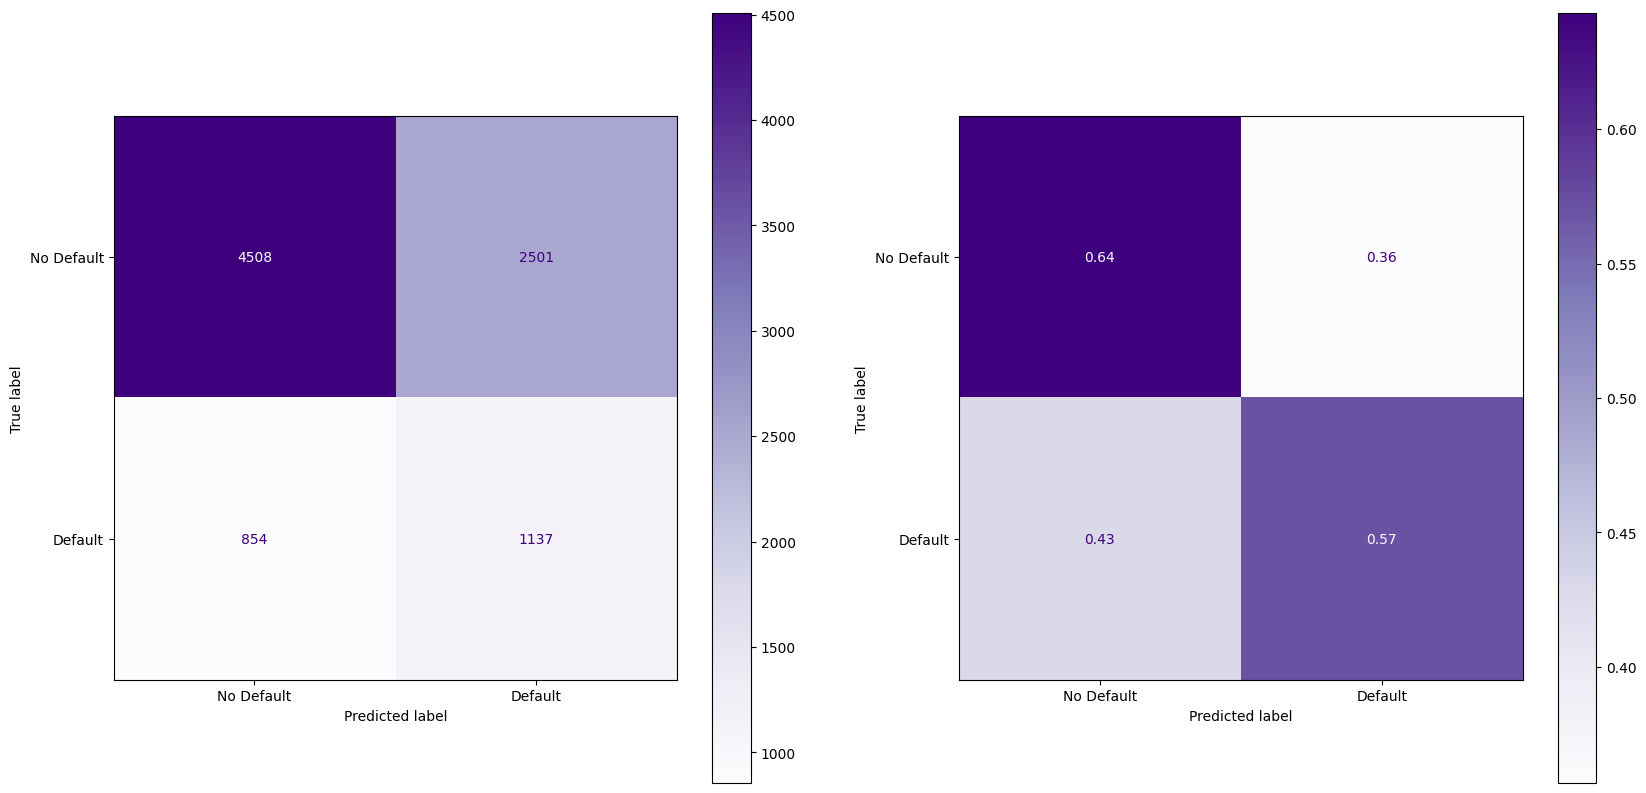

In [ ]:

print('Matriz de confusion DecisionTreeClassifier')


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Matriz de confusión sin normalización
cm1 = metrics.confusion_matrix(y_test, y_pred2, labels=DT_1.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                      display_labels=['No Default', 'Default'])
disp1.plot(ax=ax1, cmap=plt.cm.Purples)

# Matriz de confusión normalizada
cm2 = metrics.confusion_matrix(y_test, y_pred2, labels=DT_1.classes_, normalize='true')
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                      display_labels=['No Default', 'Default'])
disp2.plot(ax=ax2, cmap=plt.cm.Purples)

plt.show()

* 64% de los casos, predijo que los clientes no hacen default y es cierto. (Verdadero Negativo)
* 43% de los casos predijo que los clientes no hacen default y si hacen. (Falsos Negativos)
* 36% de los casos predijo que los clientes hacen default y no hacen. (Falso positivo)
* 57% de los casos que predijo que los clientes hacen default, los predijo correctamente; hacen default.(Verdaderos Positivos)

In [ ]:
def plot_roc_curve(fpr, tpr, roc_auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend()
    plt.show()

AUC:  0.6071214386840942


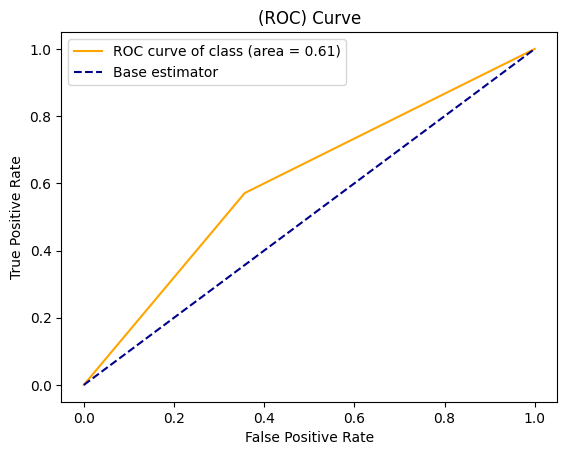

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
feature_imp_DT = pd.Series(DT_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_DT

PAY_SEP                      0.109598
LIMIT_BAL                    0.100847
PAY_JUN                      0.096290
PAY_AGOS                     0.095737
PAY_JUL                      0.092156
IMP_DE_SEP                   0.071618
IMP_DE_ABR                   0.067463
IMP_DE_AGOS                  0.060090
IMP_DE_JUL                   0.056043
IMP_DE_MAY                   0.050083
PAY_ABR                      0.050034
PAY_MAY                      0.044582
IMP_DE_JUN                   0.038822
AGE                          0.028616
MARITAL_STATUS_Casado        0.011193
EDUCATION_Posgrado           0.008811
SEX_Femenino                 0.005898
EDUCATION_Universidad        0.005512
MARITAL_STATUS_Soltero       0.005265
EDUCATION_Secundaria         0.001342
MARITAL_STATUS_Divorciado    0.000000
dtype: float64

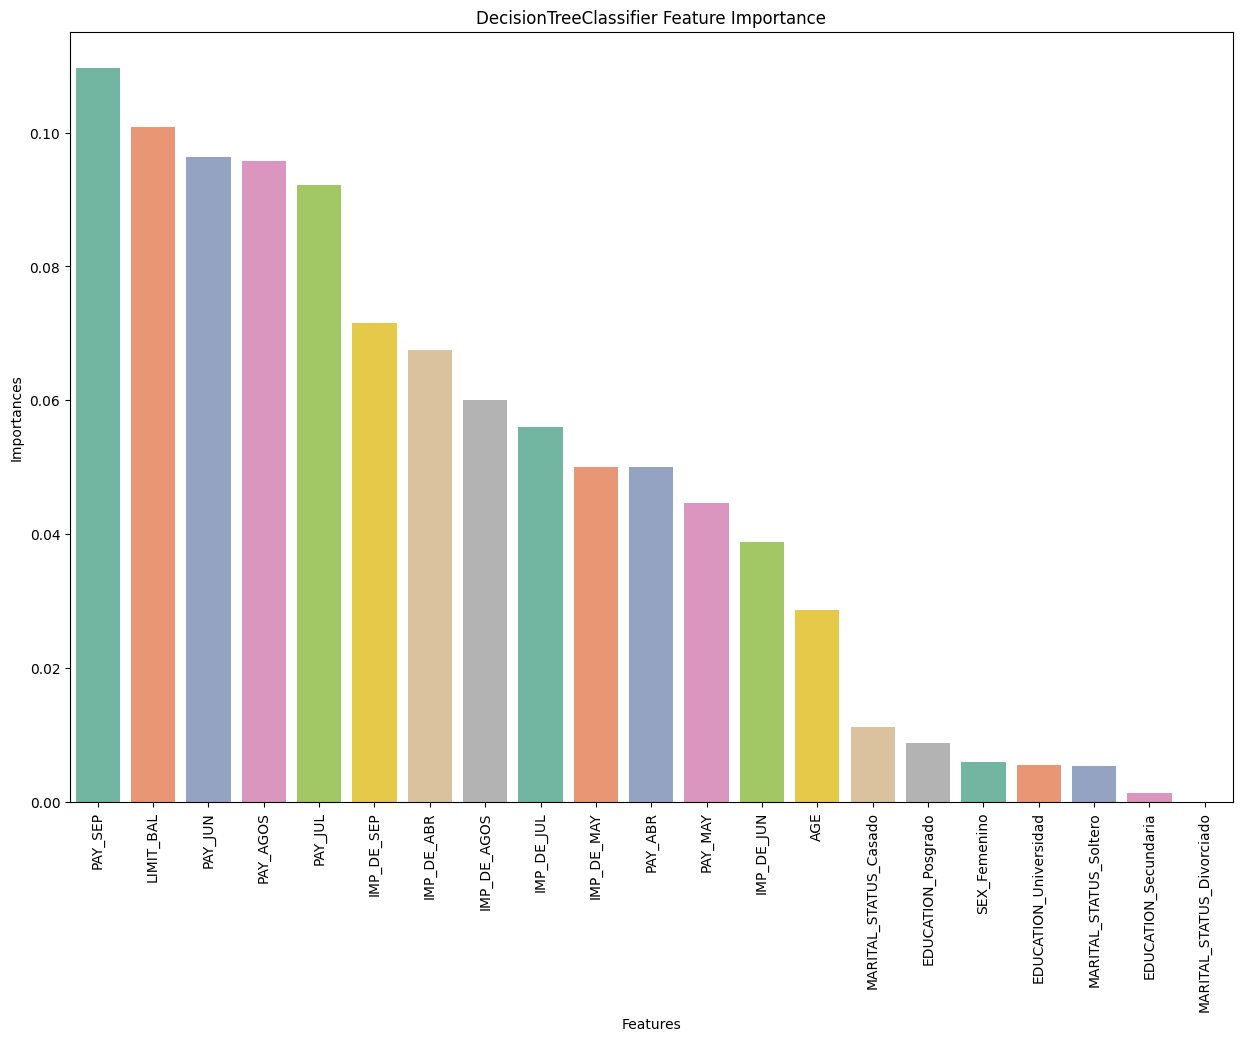

In [ ]:
importances_DT = DT_1.feature_importances_
columns = X.columns
df_DT = pd.DataFrame({'Features': columns, 'Importances': importances_DT})
df_DT = df_DT.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_DT, palette='Set2')
plt.title('DecisionTreeClassifier Feature Importance')
plt.xticks(rotation=90)

plt.show()



### **10.2 Random Forest Classifier**

In [ ]:
seed=123

In [ ]:
RF = RandomForestClassifier(
                           random_state=seed,
                            class_weight='balanced'
                            )



In [ ]:
params_RF = {
    'max_depth': [6, 8,10,12,14],
    'max_features': [ 'sqrt', 'log2'], 
     'criterion' :['gini', 'entropy'],
     'min_samples_split': [6,8,10,12,14],
     'n_estimators': [115,120,125,130,135,150]
}

RF_RS = RandomizedSearchCV(
       estimator  = RF,
       param_distributions = params_RF,
       scoring    = 'recall', 
       cv         = skf, 
       return_train_score = True,
       verbose = 1, ##para que nos de informacion del proceso en forma de texto
       n_jobs  = -1,
       n_iter=50
       )


In [ ]:
%%time
# Entrenar
rf_RS_result = RF_RS.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 10.5 s, sys: 821 ms, total: 11.3 s
Wall time: 16min 43s


In [ ]:
# Agrupar resuitados
print(f"Recall: {rf_RS_result.best_score_}\nParametros: {rf_RS_result.best_params_}")

Recall: 0.6383207750269106
Parametros: {'n_estimators': 115, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}


In [ ]:
# Obtener los mejores hyperparameter de randomized search

best_params_RF = rf_RS_result.best_params_

In [ ]:
best_params_RF

{'n_estimators': 115,
 'min_samples_split': 10,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy'}

In [ ]:
# Defino Grid search

final_params_RF = { 
                    'n_estimators': [best_params_RF['n_estimators'] - 3, best_params_RF['n_estimators'], best_params_RF['n_estimators'] + 3],
                    'min_samples_split': [best_params_RF['min_samples_split'] - 1, best_params_RF['min_samples_split'], best_params_RF['min_samples_split']  + 1],
                    'max_depth': [best_params_RF['max_depth']- 1, best_params_RF['max_depth'], best_params_RF['max_depth'] + 1],
                    'max_features': [best_params_RF['max_features']], 
                    'criterion' :['gini', 'entropy'],
                    
                  }

RF_GS = GridSearchCV(    
       estimator  = RF,
       param_grid = final_params_RF,
       scoring    = 'recall', 
       cv         = skf, 
      verbose = 1, ##para que nos de informacion del proceso en forma de texto
       return_train_score = True,
       n_jobs  = -1
       )


In [ ]:
%%time
#Entrenar
RF_GS_result = RF_GS.fit(X_train, y_train)
#Demoro 39 min 42s

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 8.12 s, sys: 669 ms, total: 8.79 s
Wall time: 11min 43s


In [ ]:
# Agrupar resuitados
print(f"Recall: {RF_GS_result.best_score_}\nParametros: {RF_GS_result.best_params_}")

Recall: 0.6669537136706136
Parametros: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 11, 'n_estimators': 115}


In [ ]:
RF_1 = RandomForestClassifier( 
                            random_state = 42,
                            class_weight = 'balanced',
                            n_estimators= 115,
                            min_samples_split = 11,
                            max_features = 'log2',
                            max_depth = 5,
                            criterion = 'gini',
                           
                             )



#Entrenar
RF_1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de train
y_pred6 = RF_1.predict(X_train) 

# Obtener las predicciones para el conjunto de datos de testeo
y_pred3 = RF_1.predict(X_test) 

In [ ]:
# Obtener las metricas
accuracy_RF_train = accuracy_score(y_train,y_pred6)
precision_RF_train =  precision_score(y_train, y_pred6)
recall_RF_train = recall_score(y_train, y_pred6)
f1_RF_train = f1_score(y_train, y_pred6)
Roc_auc_train_RF =  roc_auc_score(y_train, y_pred6)

accuracy_RF_test = accuracy_score(y_test,y_pred3)
precision_RF_test= precision_score(y_test, y_pred3)
recall_RF_test = recall_score(y_test, y_pred3)
f1_RF_test = f1_score(y_test, y_pred3)
Roc_auc_test_RF = roc_auc_score(y_test, y_pred3)




In [ ]:
# Imprimimos las metricas
vals2 = data=["Modelo 2: Random Forest ", accuracy_RF_train,accuracy_RF_test, precision_RF_train,precision_RF_test,
              recall_RF_train,recall_RF_test,f1_RF_train,f1_RF_test, Roc_auc_train_RF , Roc_auc_test_RF ] 
cols2 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_RF = pd.DataFrame([vals2], columns=cols2)

In [ ]:
round(df_metrics_RF,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 2: Random Forest,0.657,0.645,0.358,0.345,0.695,0.67,0.473,0.455,0.671,0.654


Matriz de confusion RandomForestClassifier


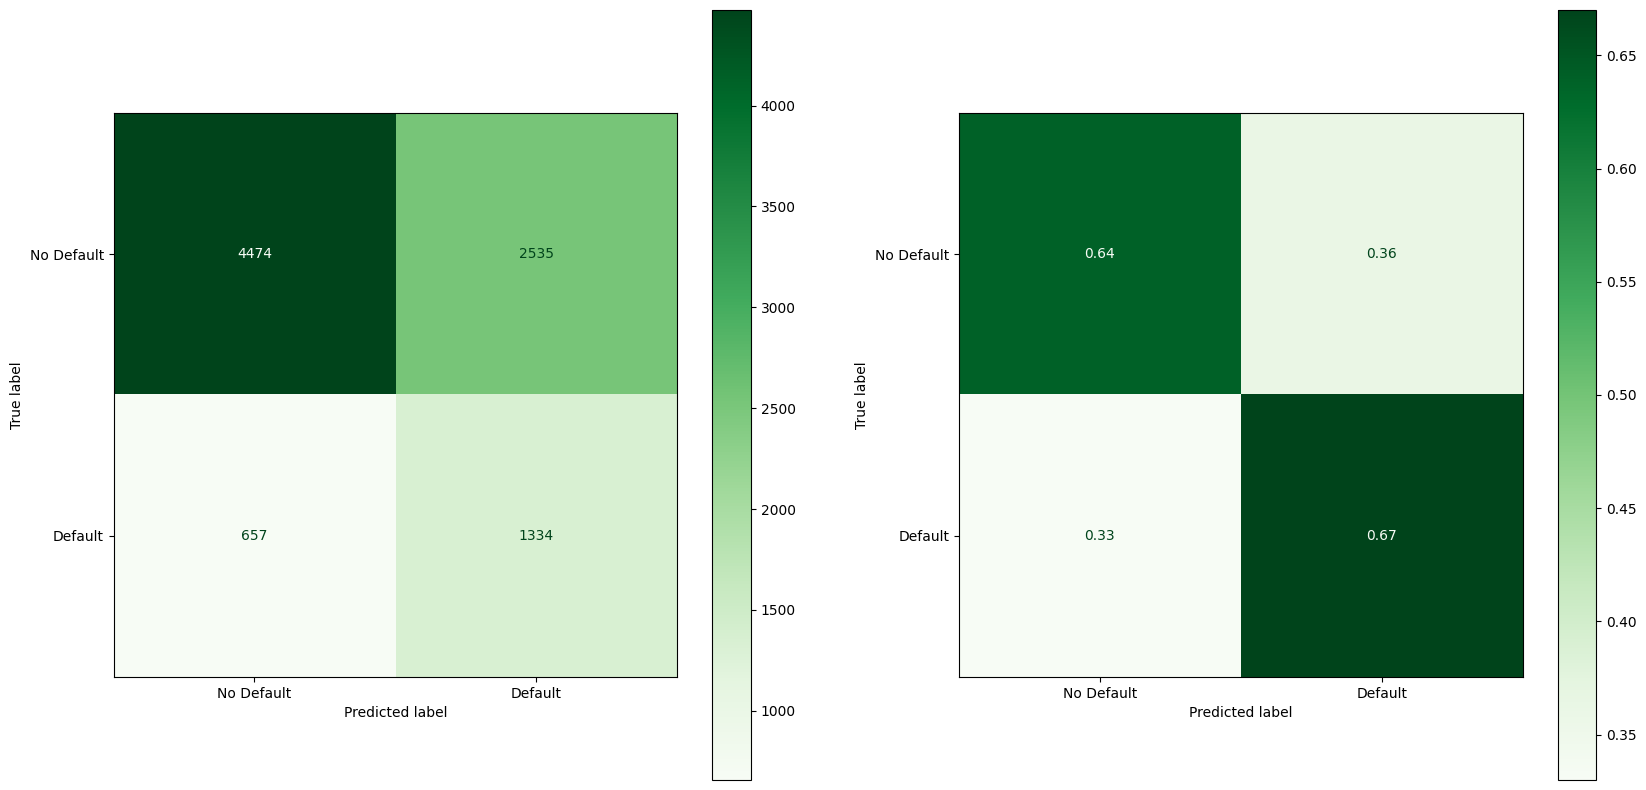

In [ ]:

print('Matriz de confusion RandomForestClassifier')


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Matriz de confusión sin normalización
cm1 = metrics.confusion_matrix(y_test, y_pred3, labels=DT_1.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                      display_labels=['No Default', 'Default'])
disp1.plot(ax=ax1, cmap=plt.cm.Greens)

# Matriz de confusión normalizada
cm2 = metrics.confusion_matrix(y_test, y_pred3, labels=DT_1.classes_, normalize='true')
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                      display_labels=['No Default', 'Default'])
disp2.plot(ax=ax2, cmap=plt.cm.Greens)

plt.show()

* 64% de los casos, predijo que los clientes no hacen default y es cierto. (Verdadero Negativo)
* 33% de los casos predijo que los clientes no hacen default y si hacen. (Falsos Negativos)
* 36% de los casos predijo que los clientes hacen default y no hacen. (Falso positivo)
* 67% de los casos que predijo que los clientes hacen default, los predijo correctamente; hacen default.(Verdaderos Positivos)

AUC:  0.6541686125157731


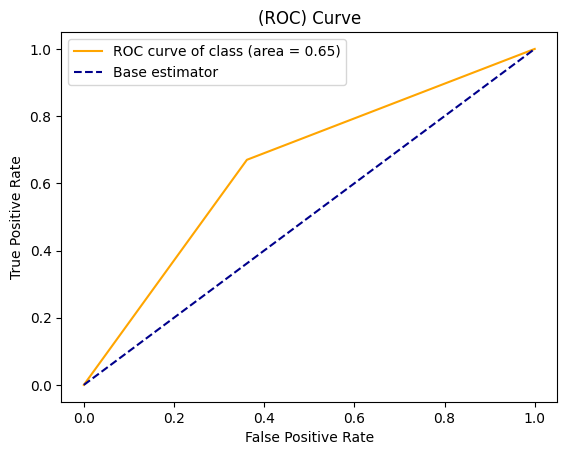

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
feature_imp_RF = pd.Series(RF_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_RF

LIMIT_BAL                    0.184164
PAY_SEP                      0.164849
PAY_AGOS                     0.142152
PAY_JUL                      0.091657
PAY_JUN                      0.059747
PAY_ABR                      0.058332
IMP_DE_AGOS                  0.045301
IMP_DE_ABR                   0.044809
PAY_MAY                      0.040650
IMP_DE_JUL                   0.039299
IMP_DE_JUN                   0.036044
IMP_DE_MAY                   0.035928
IMP_DE_SEP                   0.035161
AGE                          0.008639
SEX_Femenino                 0.003787
EDUCATION_Posgrado           0.002730
MARITAL_STATUS_Soltero       0.002261
MARITAL_STATUS_Casado        0.002130
EDUCATION_Universidad        0.001433
EDUCATION_Secundaria         0.000792
MARITAL_STATUS_Divorciado    0.000134
dtype: float64

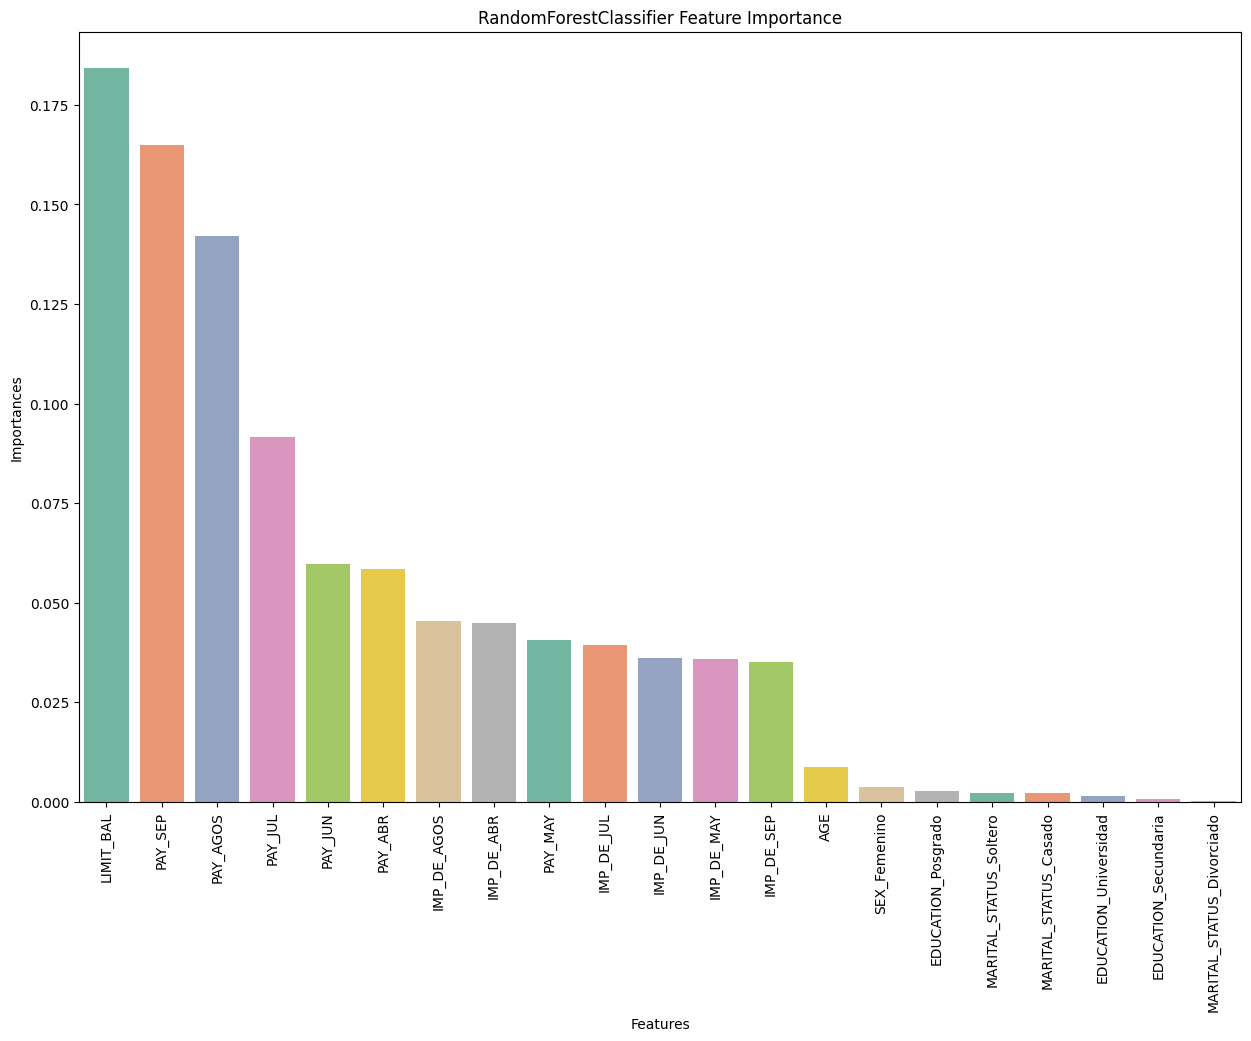

In [ ]:
importances_RF = RF_1.feature_importances_
columns = X.columns
df_RF = pd.DataFrame({'Features': columns, 'Importances': importances_RF})
df_RF = df_RF.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_RF, palette='Set2')
plt.title('RandomForestClassifier Feature Importance')
plt.xticks(rotation=90)

plt.show()

###**10.3 LGBMClassifier**

In [ ]:
LG = lgb.LGBMClassifier(random_state = seed, 
class_weight='balanced' )

In [ ]:
# Aplico tuning de hyperparametros del modelo

params_LG = {
    'num_leaves': sp_randint(6, 50),
    'max_depth': sp_randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Defino Randomized search
LG_RS = RandomizedSearchCV(
       estimator  = LG,
       param_distributions = params_LG,
       scoring    = 'recall', 
       cv         = skf, 
       return_train_score = True,
       verbose = 1, ##para que nos de informacion del proceso en forma de texto
       n_jobs  = -1,
       n_iter = 50, 
       random_state = 245
       )


In [ ]:
#Entrenar
%%time
LG_RS_result = LG_RS.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 2.51 s, sys: 322 ms, total: 2.83 s
Wall time: 3min 7s


In [ ]:
# Agrupar resultados
print(f"Recall: {LG_RS_result.best_score_}\nParametros: {LG_RS_result.best_params_}")

Recall: 0.6656620021528525
Parametros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 10, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [ ]:
# Obtener los mejores hiperparámetros de randomized search
best_params_LG = LG_RS_result.best_params_

In [ ]:
best_params_LG

{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'num_leaves': 10,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [ ]:
# Defino Grid search
final_params_LG = {'n_estimators': [best_params_LG['n_estimators'] - 50, best_params_LG['n_estimators'], best_params_LG['n_estimators'] + 50,
                             best_params_LG['n_estimators'] + 25,best_params_LG['n_estimators'] -25],
            'max_depth': [best_params_LG['max_depth'] - 1, best_params_LG['max_depth'], best_params_LG['max_depth'] + 1],
            'num_leaves': [best_params_LG['num_leaves'] - 1, best_params_LG['num_leaves'], best_params_LG['num_leaves'] + 1],
            'reg_alpha': [ best_params_LG['reg_alpha']],
            'reg_lambda': [max(best_params_LG['reg_lambda'] - 0.1, 0.0), best_params_LG['reg_lambda'], best_params_LG['reg_lambda'] + 0.1],
            'learning_rate': [max(best_params_LG['learning_rate'] - 0.1, 0.01), best_params_LG['learning_rate'], best_params_LG['learning_rate'] + 0.1]
            
            }

LG_GS = GridSearchCV(    
       estimator  = LG,
       param_grid = final_params_LG,
       scoring    = 'recall', 
       cv         = skf, 
       return_train_score = True,
       verbose = 1, ##para que nos de informacion del proceso en forma de texto
       n_jobs  = -1 
       )

In [ ]:
#Entrenar
LG_GS_result = LG_GS.fit(X_train, y_train)
#Tiempo 10 min 35s

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [ ]:
#Agrupar resultados
print(f"Recall: {LG_GS_result.best_score_}\nParametros: {LG_GS_result.best_params_}")

Recall: 0.7181916038751346
Parametros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 9, 'reg_alpha': 0, 'reg_lambda': 0.6}


In [ ]:
#Aplicamos los parametros obtenidos 
LG_1 = lgb.LGBMClassifier(
                          random_state = seed, 
                          class_weight='balanced',
                          learning_rate = 0.01, 
                          max_depth = 3, 
                          n_estimators = 50, 
                          num_leaves = 9, 
                          reg_alpha = 0, 
                          reg_lambda = 0.6 
                          )

# Entrenar
LG_1.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de train
y_pred4 = LG_1.predict(X_train) 

# Obtener las predicciones para el conjunto de datos de testeo
y_pred8 = LG_1.predict(X_test) 



In [ ]:
# Obtener las metricas
accuracy_LG_train = accuracy_score(y_train,y_pred4)
precision_LG_train =  precision_score(y_train, y_pred4)
recall_LG_train = recall_score(y_train, y_pred4)
f1_LG_train = f1_score(y_train, y_pred4)
Roc_auc_train_LG =  roc_auc_score(y_train, y_pred4)

accuracy_LG_test = accuracy_score(y_test,y_pred8)
precision_LG_test= precision_score(y_test, y_pred8)
recall_LG_test = recall_score(y_test, y_pred8)
f1_LG_test = f1_score(y_test, y_pred8)
Roc_auc_test_LG = roc_auc_score(y_test, y_pred8)




In [ ]:
# Imprimimos las metricas
vals2 = data=["Modelo 3: LGBMClassifier ", accuracy_LG_train,accuracy_LG_test, precision_LG_train,precision_LG_test,
              recall_LG_train, recall_LG_test, f1_LG_train,f1_LG_test, Roc_auc_train_LG , Roc_auc_test_LG ] 
cols2 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_LG = pd.DataFrame([vals2], columns=cols2)

In [ ]:
round(df_metrics_LG,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 3: LGBMClassifier,0.59,0.577,0.314,0.303,0.721,0.703,0.437,0.423,0.637,0.622


Matriz de confusion LGBMClassifier


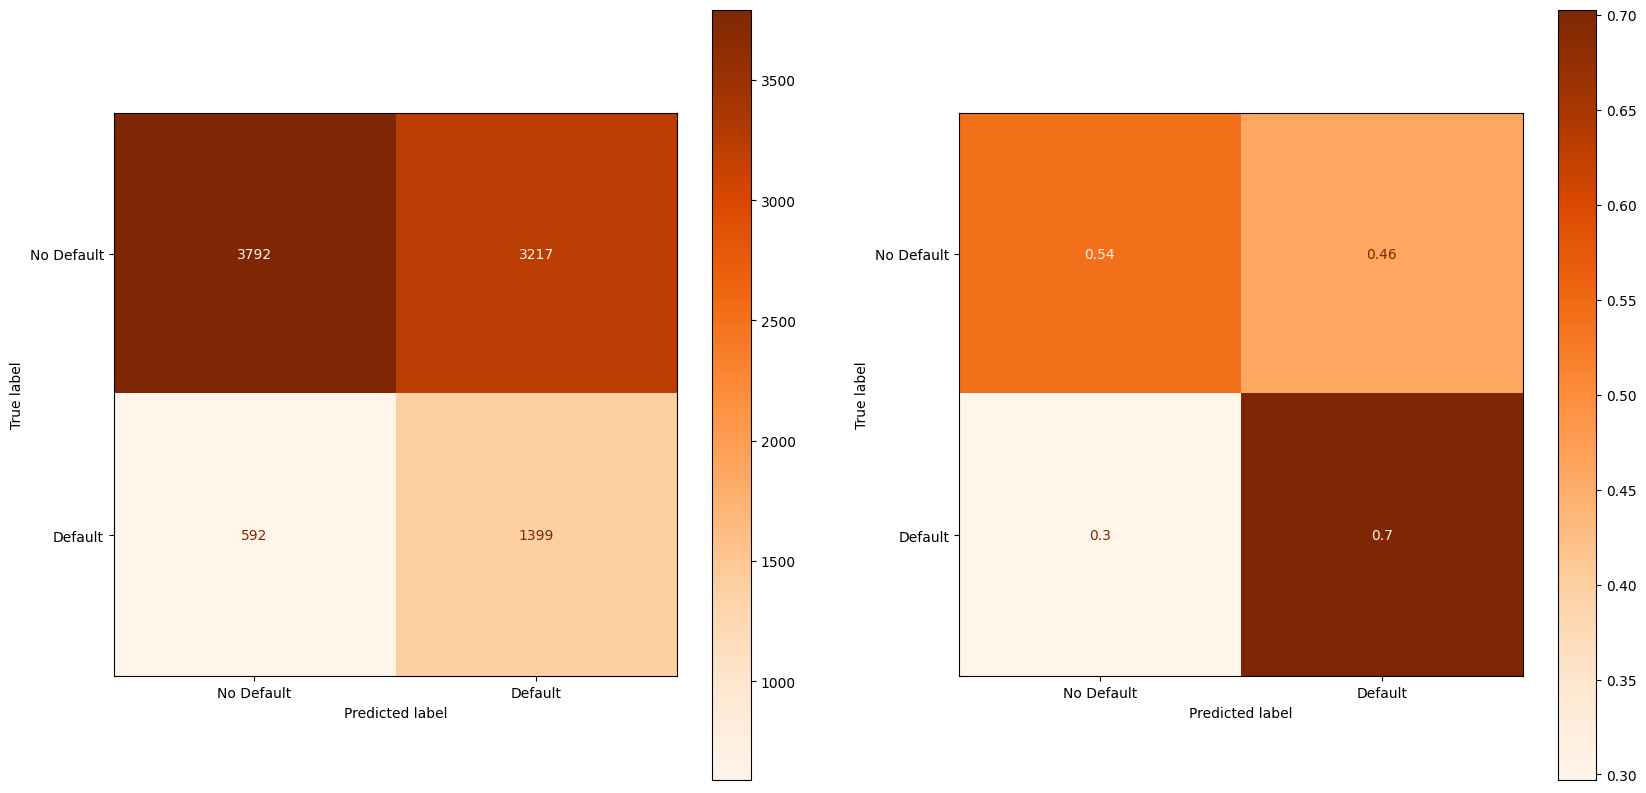

In [ ]:

print('Matriz de confusion LGBMClassifier')


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Matriz de confusión sin normalización
cm1 = metrics.confusion_matrix(y_test, y_pred8, labels=DT_1.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                      display_labels=['No Default', 'Default'])
disp1.plot(ax=ax1, cmap=plt.cm.Oranges)

# Matriz de confusión normalizada
cm2 = metrics.confusion_matrix(y_test, y_pred8, labels=DT_1.classes_, normalize='true')
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                      display_labels=['No Default', 'Default'])
disp2.plot(ax=ax2, cmap=plt.cm.Oranges)

plt.show()

* 54% de los casos, predijo que los clientes no hacen default y es cierto. (Verdadero Negativo)
* 30% de los casos predijo que los clientes no hacen default y si hacen. (Falsos Negativos)
* 46% de los casos predijo que los clientes hacen default y no hacen. (Falso positivo)
* 70% de los casos que predijo que los clientes hacen default, los predijo correctamente; hacen default.(Verdaderos Positivos)

AUC:  0.6541686125157731


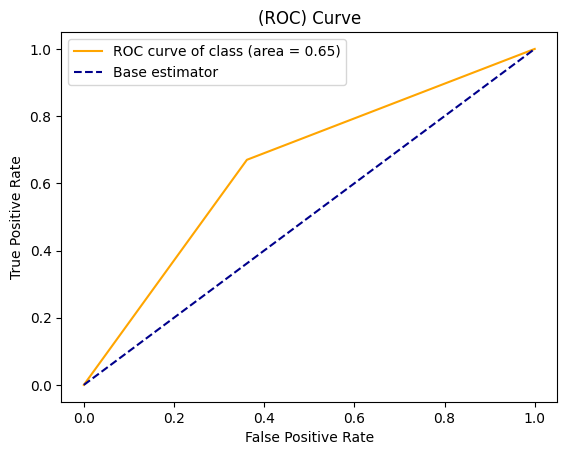

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
feature_imp_LG = pd.Series(LG_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_LG

PAY_AGOS                     90
PAY_SEP                      81
IMP_DE_AGOS                  75
LIMIT_BAL                    50
PAY_JUL                      16
IMP_DE_JUL                   14
IMP_DE_SEP                   13
IMP_DE_JUN                    7
IMP_DE_MAY                    4
PAY_MAY                       0
PAY_JUN                       0
IMP_DE_ABR                    0
SEX_Femenino                  0
EDUCATION_Posgrado            0
AGE                           0
MARITAL_STATUS_Soltero        0
MARITAL_STATUS_Divorciado     0
MARITAL_STATUS_Casado         0
EDUCATION_Universidad         0
EDUCATION_Secundaria          0
PAY_ABR                       0
dtype: int32

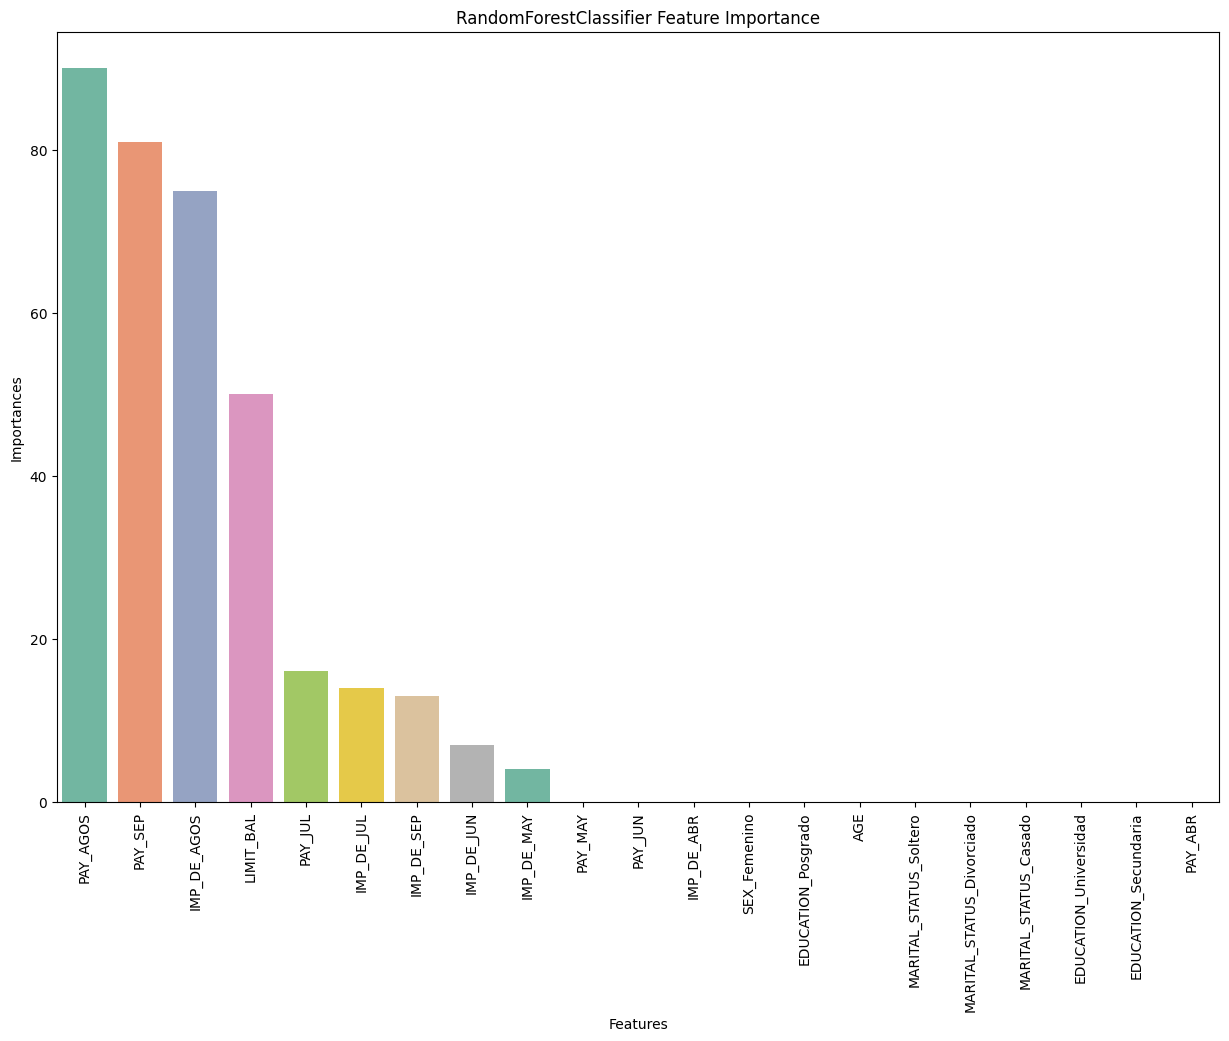

In [ ]:
importances_LG = LG_1.feature_importances_
columns = X.columns
df_LG = pd.DataFrame({'Features': columns, 'Importances': importances_LG})
df_LG = df_LG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_LG, palette='Set2')
plt.title('RandomForestClassifier Feature Importance')
plt.xticks(rotation=90)

plt.show()

## **10.4 Comparamos los resultados de nuestros modelos**

In [ ]:
df_metrics = pd.concat([df_metrics_DT,df_metrics_RF,df_metrics_LG])

In [ ]:
round(df_metrics.sort_values(by = ["Accuracy_test"]  ,ascending = False),2)

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 2: Random Forest,0.66,0.65,0.36,0.34,0.69,0.67,0.47,0.46,0.67,0.65
0,Modelo 1: DecisionTreeClassifier,0.73,0.63,0.44,0.31,0.81,0.57,0.57,0.40,0.76,0.61
0,Modelo 3: LGBMClassifier,0.59,0.58,0.31,0.30,0.72,0.70,0.44,0.42,0.64,0.62


In [ ]:
df_metrics_1 = df_metrics[["Modelo","Accuracy_test", "Precision_test","Recall_test","f1 score_test"]]

In [ ]:
# hago un melt para poder hacer un gráfico de barras de cada métrica

df_melt = pd.melt(df_metrics_1, id_vars=['Modelo'], value_vars=["Accuracy_test", "Precision_test","Recall_test","f1 score_test"], 
                )

df_melt = df_melt.rename(columns={"variable": "Métrica", "value": "Valor"})

In [ ]:
df_melt

,Modelo,Métrica,Valor
0,Modelo 1: DecisionTreeClassifier,Accuracy_test,0.627222
1,Modelo 2: Random Forest,Accuracy_test,0.645333
2,Modelo 3: LGBMClassifier,Accuracy_test,0.576778
3,Modelo 1: DecisionTreeClassifier,Precision_test,0.312534
4,Modelo 2: Random Forest,Precision_test,0.344792
5,Modelo 3: LGBMClassifier,Precision_test,0.303076
6,Modelo 1: DecisionTreeClassifier,Recall_test,0.571070
7,Modelo 2: Random Forest,Recall_test,0.670015
8,Modelo 3: LGBMClassifier,Recall_test,0.702662
9,Modelo 1: DecisionTreeClassifier,f1 score_test,0.403979


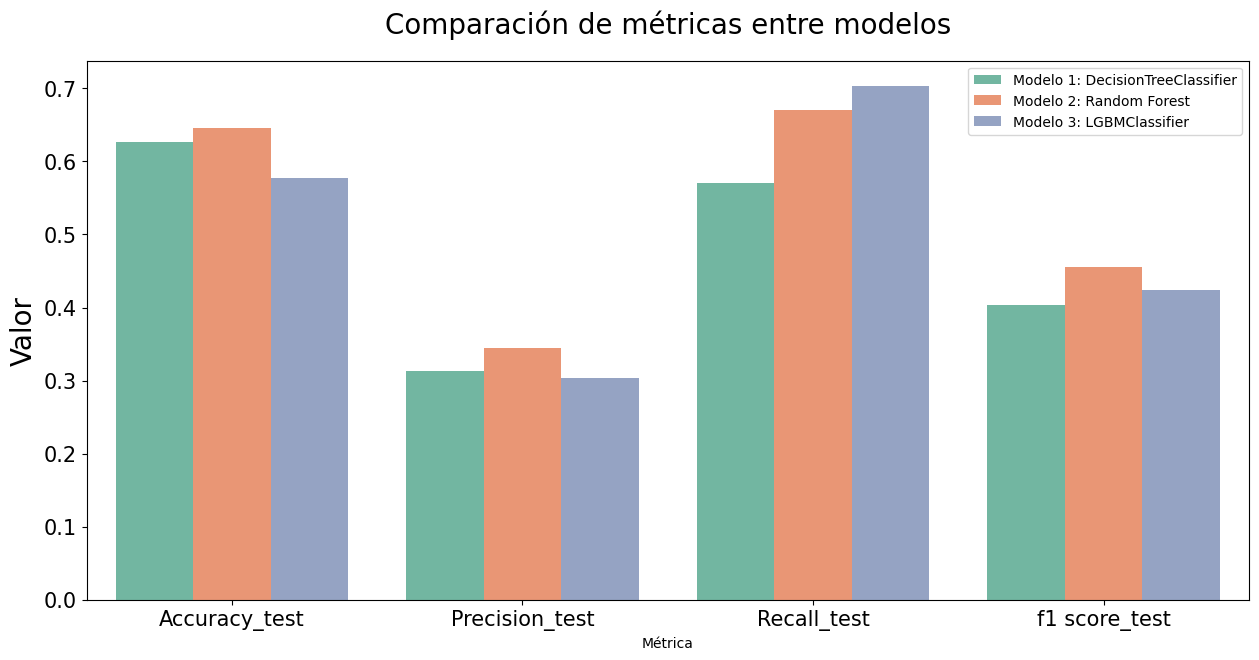

In [ ]:
# hago un gráfico de barras comparativo de cada una de las métricas para cada modelo

fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt, palette = "Set2")
ax.axes.set_title("Comparación de métricas entre modelos",fontsize=20, pad=20)
ax.set_ylabel("Valor",fontsize=20)
ax.tick_params(labelsize=15)
plt.legend(loc='upper right', fontsize='medium')

plt.show()

## **11. Conclusiones** 💁‍♂️

Basado en los resultados de los modelos y las métricas obtenidas, podemos concluir lo siguiente para el problema de clasificación binaria de predecir si un cliente hará default o no el mes próximo:

Desempeño del modelo: Los modelos evaluados presentan resultados variados en términos de precisión, recall y puntuación F1 en el conjunto de prueba. El Modelo 2: Random Forest muestra el mejor desempeño general, con una precisión de 0.344792, recall de 0.670015 y puntuación F1 de 0.455290.

Umbral de recall: Aunque los modelos no alcanzaron el umbral mínimo de recall establecido del 85%, se observa un progreso significativo en la capacidad de los modelos para identificar correctamente los casos de default. El Modelo 3: LGBMClassifier alcanza un recall más alto con un valor de 0.702662, lo que indica una mejora notable en la identificación de casos de default en comparación con los otros modelo, pero aún no llega al umbral deseado.

Enfoque sin balanceo de clases: Al no aplicar técnicas de balanceo de clases, se logra una representación más realista de la distribución de clases en el mundo real. Esto puede ser beneficioso para la generalización del modelo y la captura de patrones más fieles a la realidad.

Consideraciones adicionales:

Aunque no se alcanzó el umbral deseado de recall del 85%, se lograron mejoras en comparación con los otros modelos evaluados.
Se sugiere seguir ajustando los hiperparámetros y explorar técnicas de selección de características para mejorar aún más el rendimiento del modelo.
La obtención de más datos de la clase minoritaria y la exploración de técnicas de balanceo de clases podrían ser opciones adicionales para abordar el desequilibrio en futuras iteraciones.

